We will conduct some statistical analysis of long-term daily financial data, namely the prices of the following market indices: 

1) S&P 500 from March 1957 to October 2023, i.e., 66.5 years
2) Dow Jones Industrial Average from February 1900 to October 2023, i.e., 123.5 years.

We will attempt to see some properties of the distributions of their price changes and compare them to those of a process whose changes follow normal and lognormal distributions.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
filepath1='S&P500 - 030457-102023(csv).csv'
df1=pd.read_csv(filepath1)

df1['Pricing Date'] = pd.to_datetime(df1['Pricing Date'])
df1 = df1.sort_values(by='Pricing Date')
df1 = df1.reset_index(drop=True)

df1.rename(columns={'S&P 500 Price Return-Index Value (Daily)': 'SP500 Price'}, inplace=True)
df1.rename(columns={'Pricing Date': 'SP500 Date'}, inplace=True)

print(df1)

      SP500 Date SP500 Price
0     1957-03-04       44.06
1     1957-03-05       44.22
2     1957-03-06       44.33
3     1957-03-07       44.21
4     1957-03-08       44.07
...          ...         ...
16773 2023-10-16    4,373.63
16774 2023-10-17    4,373.20
16775 2023-10-18    4,314.60
16776 2023-10-19    4,278.00
16777 2023-10-20    4,234.47

[16778 rows x 2 columns]


In [4]:
filepath2='DJIA - 02021900-10202023(csv).csv'
df2=pd.read_csv(filepath2)

df2['Pricing Date'] = pd.to_datetime(df2['Pricing Date'])
df2 = df2.sort_values(by='Pricing Date')
df2 = df2.reset_index(drop=True)

df2.rename(columns={'Dow Jones Industrial Average Price Return-Index Value (Daily)': 'DJIA Price'}, inplace=True)
df2.rename(columns={'Pricing Date': 'DJIA Date'}, inplace=True)

print(df2)

       DJIA Date DJIA Price
0     1900-02-01      67.34
1     1900-02-02      67.86
2     1900-02-03      67.88
3     1900-02-05      68.36
4     1900-02-06      68.03
...          ...        ...
35353 2023-10-16  33,984.54
35354 2023-10-17  33,997.65
35355 2023-10-18  33,665.08
35356 2023-10-19  33,414.17
35357 2023-10-20  33,147.70

[35358 rows x 2 columns]


In [5]:
# Adding a column for log of prices

df1['SP500 Price'] = df1['SP500 Price'].str.replace(',', '').astype(float)
df1['SP500Log_price']=np.log10(df1['SP500 Price'])

df2['DJIA Price'] = df2['DJIA Price'].str.replace(',', '').astype(float)
df2['DJIALog_price']=np.log10(df2['DJIA Price'])

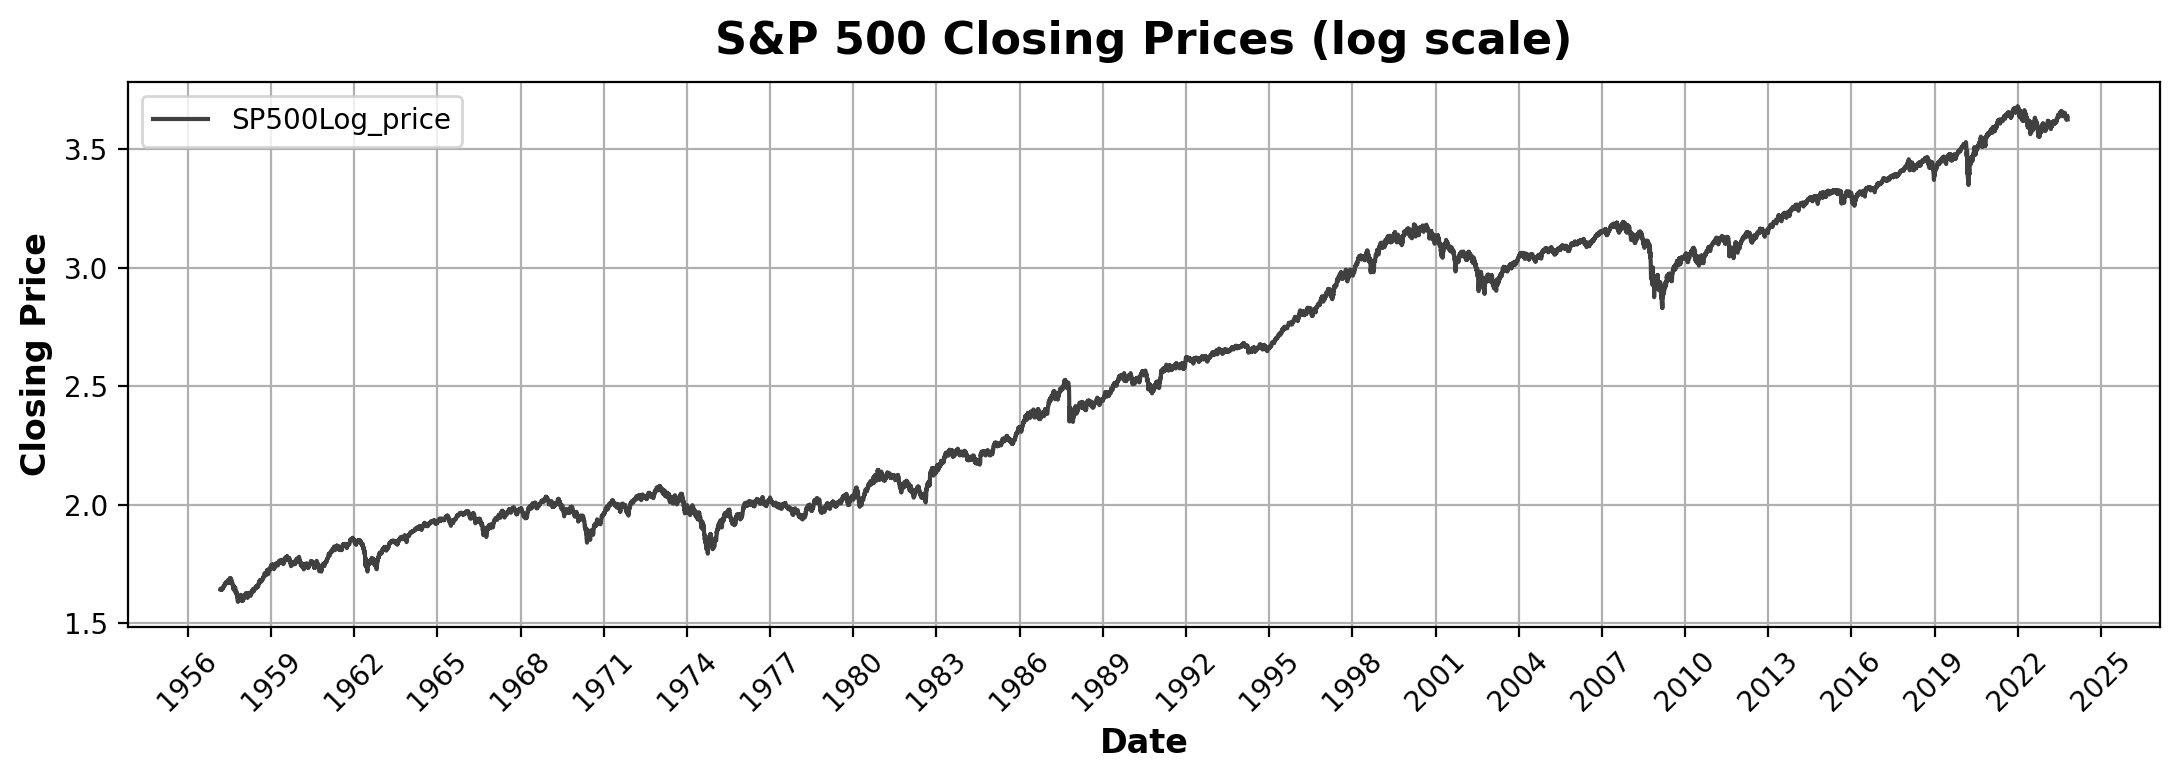

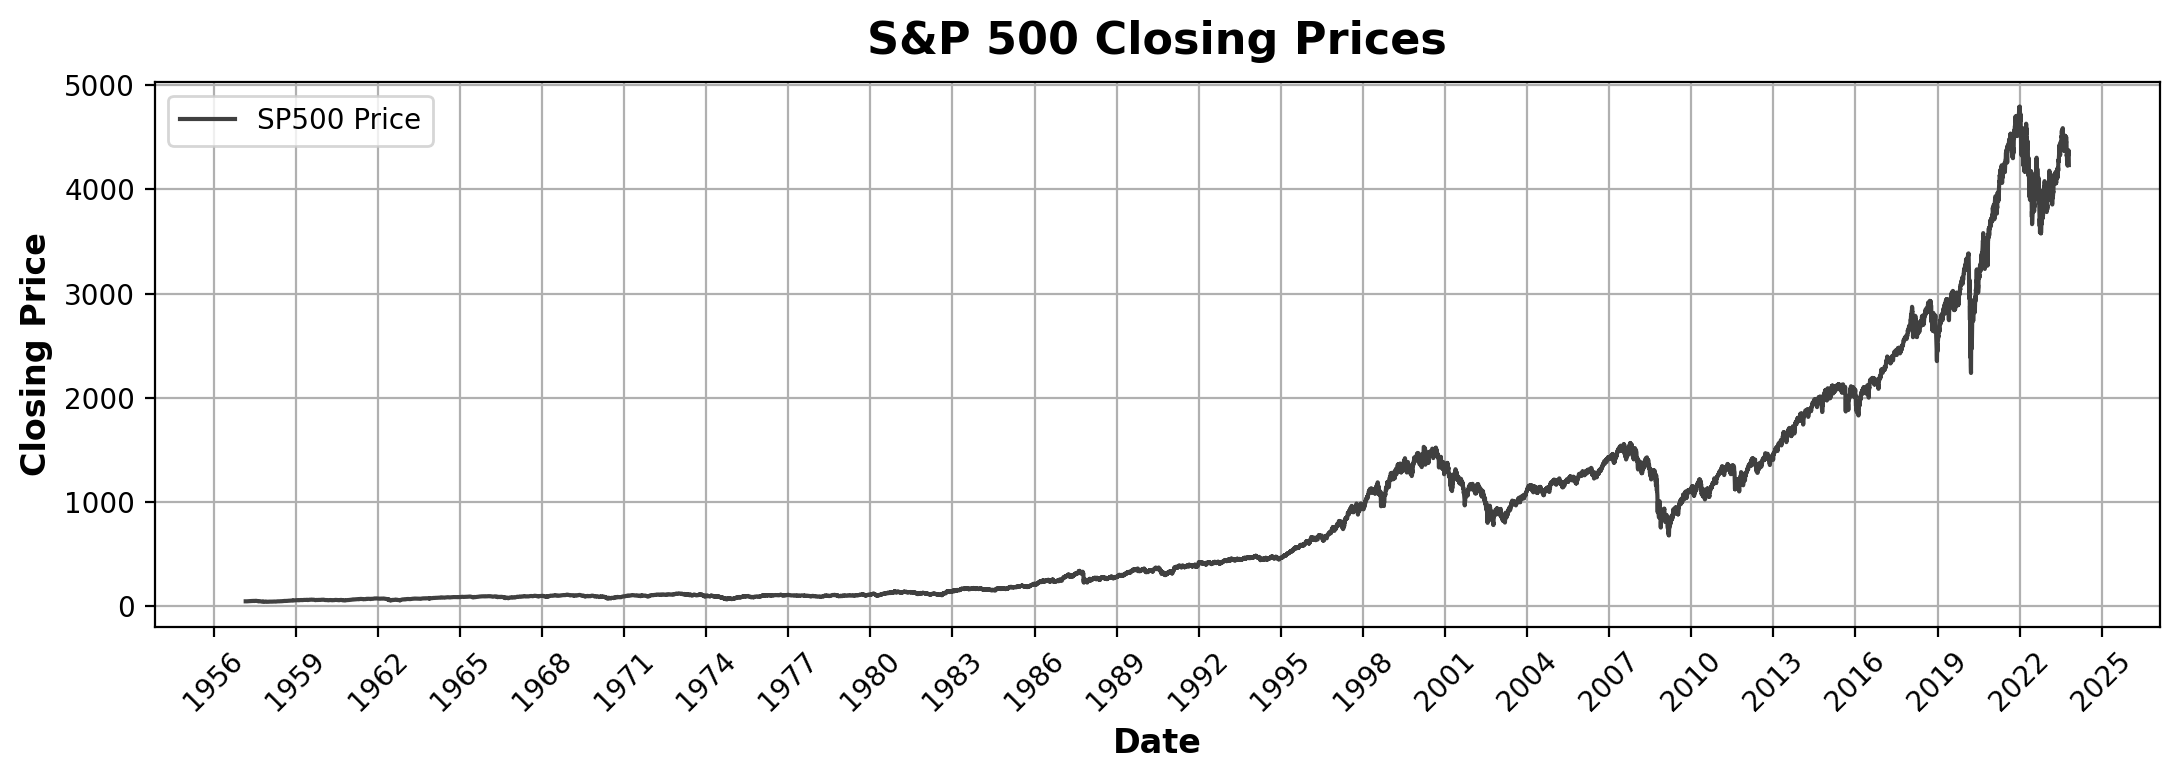

In [6]:
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.plot('SP500 Date', 'SP500Log_price', data=df1, color='0.25')
ax.set_xlabel('Date')
ax.set_ylabel('Closing Price')
ax.set_title('S&P 500 Closing Prices (log scale)')

# following few lines to show months as well
years = mdates.YearLocator(3)
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

fig1, ax1 = plt.subplots()
ax1.plot('SP500 Date', 'SP500 Price', data=df1, color='0.25')
ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price')
ax1.set_title('S&P 500 Closing Prices')

years = mdates.YearLocator(3)
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

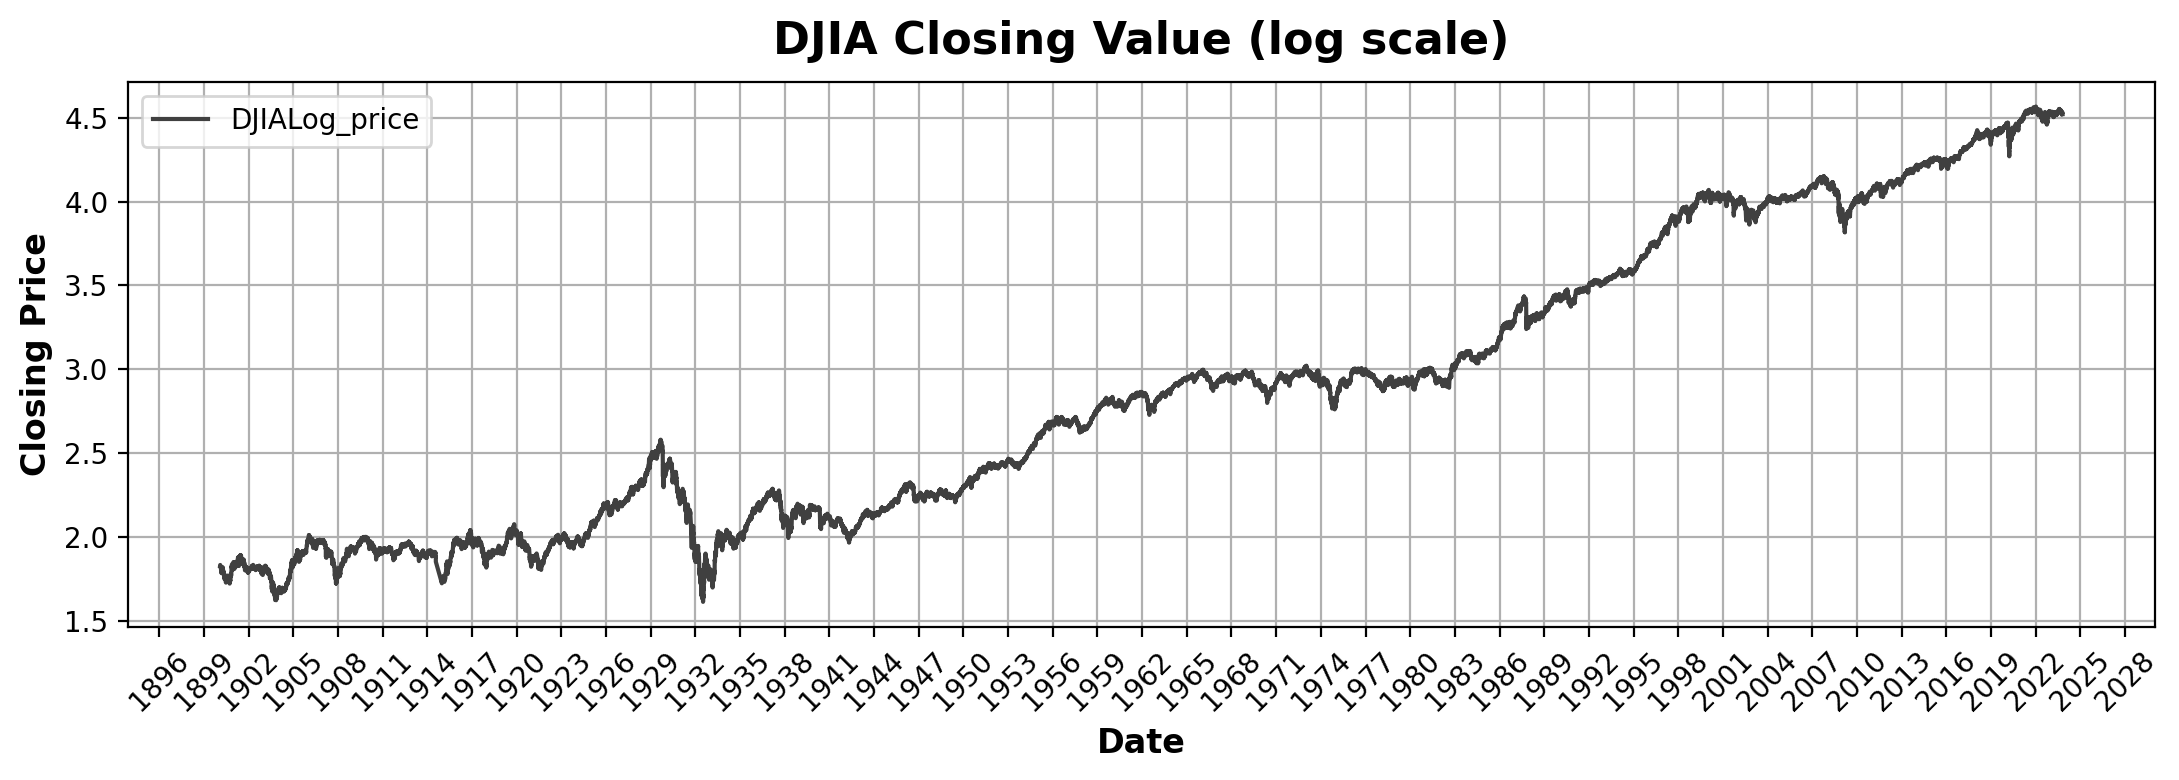

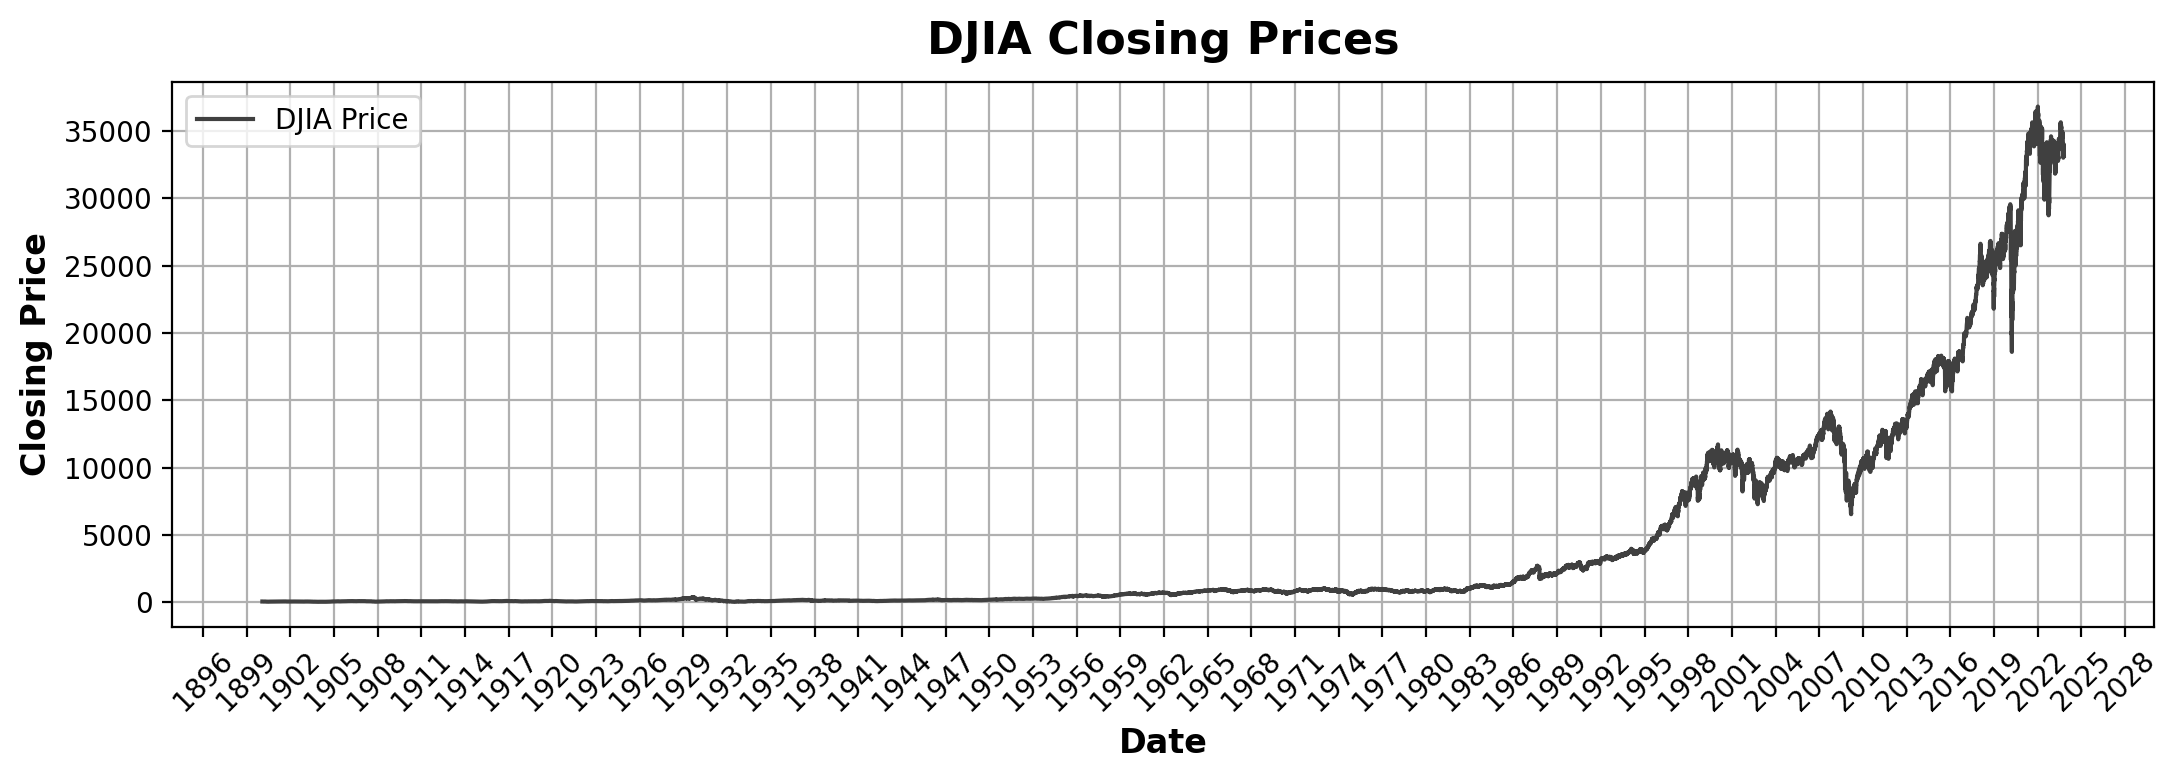

In [7]:
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.plot('DJIA Date', 'DJIALog_price', data=df2, color='0.25')
ax.set_xlabel('Date')
ax.set_ylabel('Closing Price')
ax.set_title('DJIA Closing Value (log scale)')

#date_format = mdates.DateFormatter('%Y-%m')  # Format: Year-Month
years = mdates.YearLocator(3)
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

fig1, ax1 = plt.subplots()
ax1.plot('DJIA Date', 'DJIA Price', data=df2, color='0.25')
ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price')
ax1.set_title('DJIA Closing Prices')

years = mdates.YearLocator(3)
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45) 
plt.grid(True)
plt.legend()
plt.tight_layout()

We see a lot more structure in the log plots. This is because of the scaling effect. We will see this in stark detail in later plots of daily changes. Before that, we show some realizations of a Wiener process or a Brownian motion which is characterized by the conditions that (i) the increment at time *t* is independent of values at all times before *t*, and (ii) all changes follow a normal distribution. Further below, we will look at daily changes in the prices of the indices and compare them to those of a sample Brownian motion process. 

To ensure positive price values, we can consider a process whose logarithm is a normal process with a drift. This is called a geometric Brownian motion whose increments are lognormally distributed. Percentage changes in the geometric Brownian motion are Gaussian distributed.

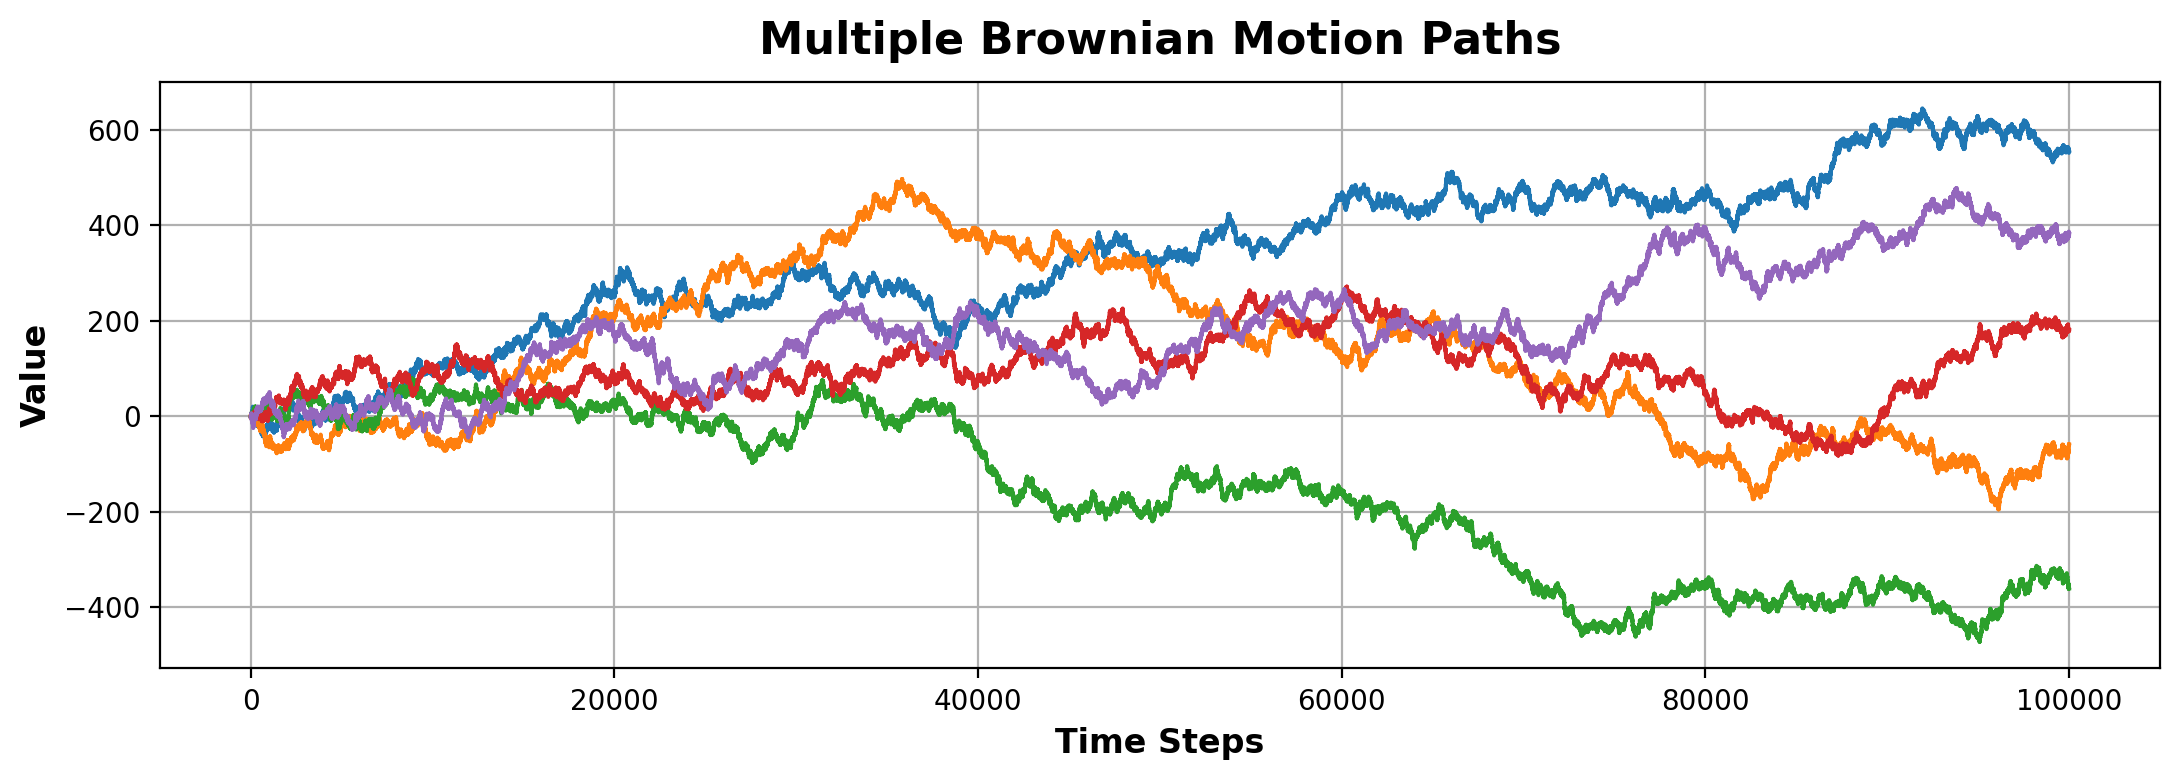

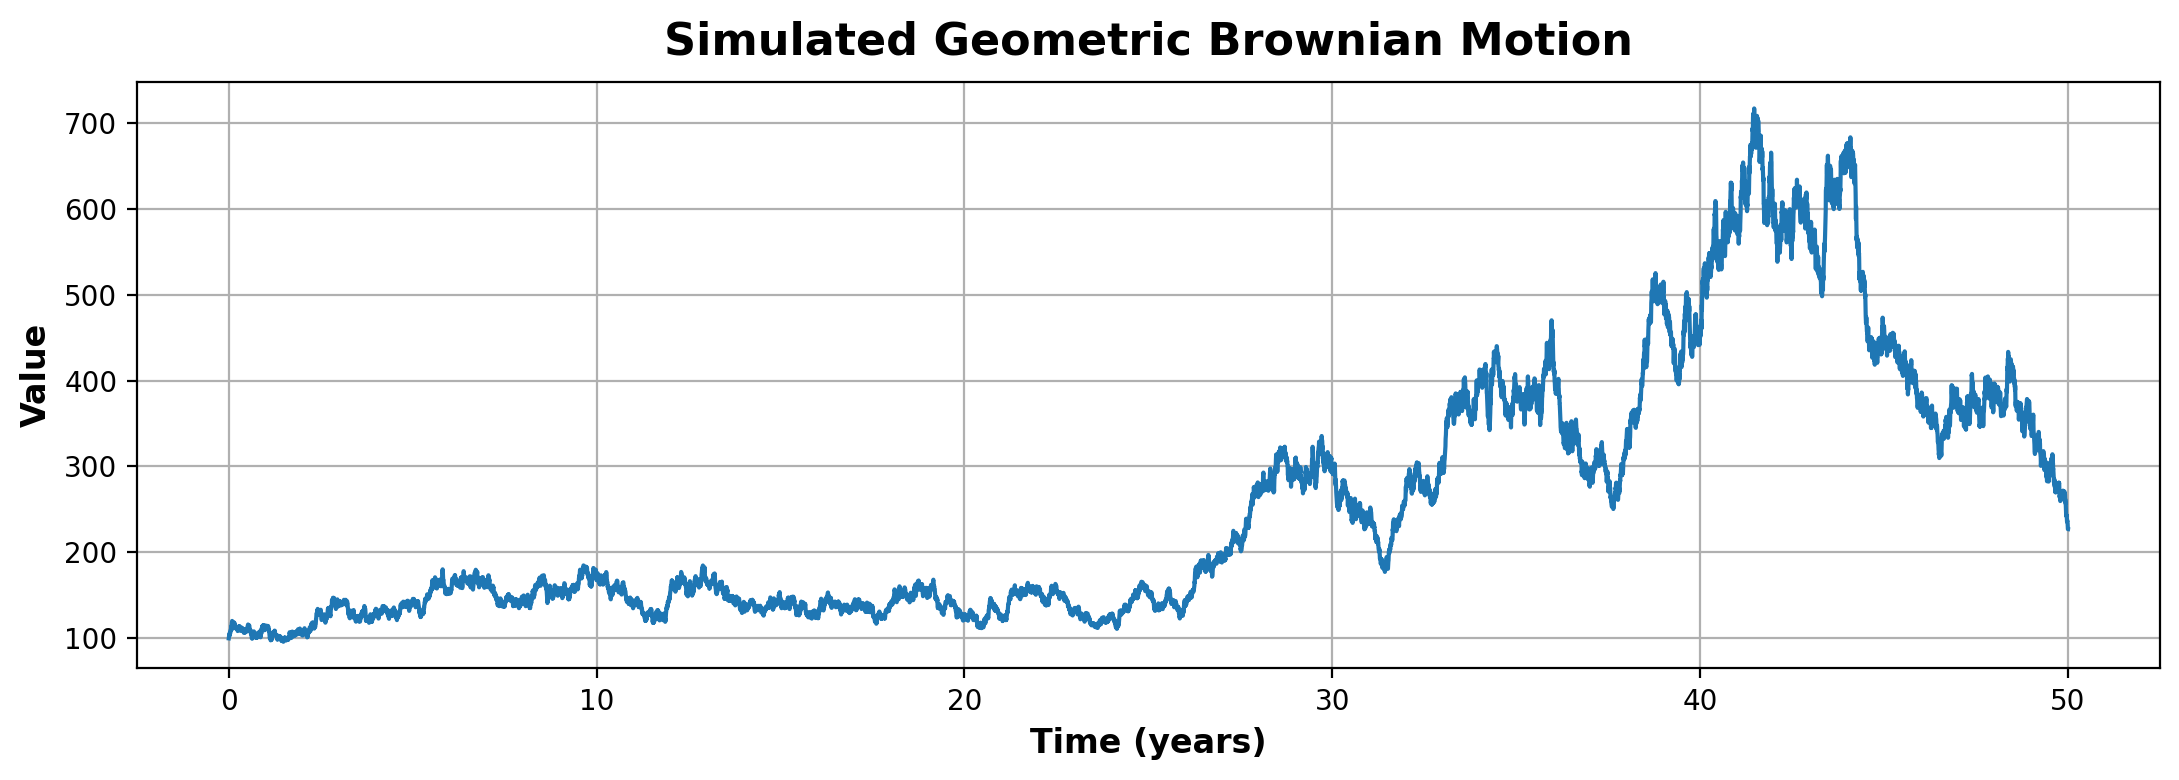

In [8]:
num_steps=100000
num_paths=5

for _ in range(num_paths):
    increments=np.random.normal(loc=0, scale=1, size=num_steps)
    brownian_motion=np.cumsum(increments)
    plt.plot(range(num_steps), brownian_motion)

plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.title('Multiple Brownian Motion Paths')
plt.grid(True)
plt.show()

S0=100.0
mu=0.05
vol=0.2
T=50
dt=1/252

num_steps1=int(T/dt)+1
time=np.linspace(0,T,num_steps1)
gbval=np.zeros(num_steps1)
gbval[0]=S0

for i in range(1,num_steps1):
    dW=np.random.normal(loc=0,scale=np.sqrt(dt))
    gbval[i]=gbval[i-1]*np.exp((mu-0.5*vol**2)*dt + vol*dW)

plt.plot(time, gbval)
plt.xlabel('Time (years)')
plt.ylabel('Value')
plt.title('Simulated Geometric Brownian Motion')
plt.grid(True)
plt.show()

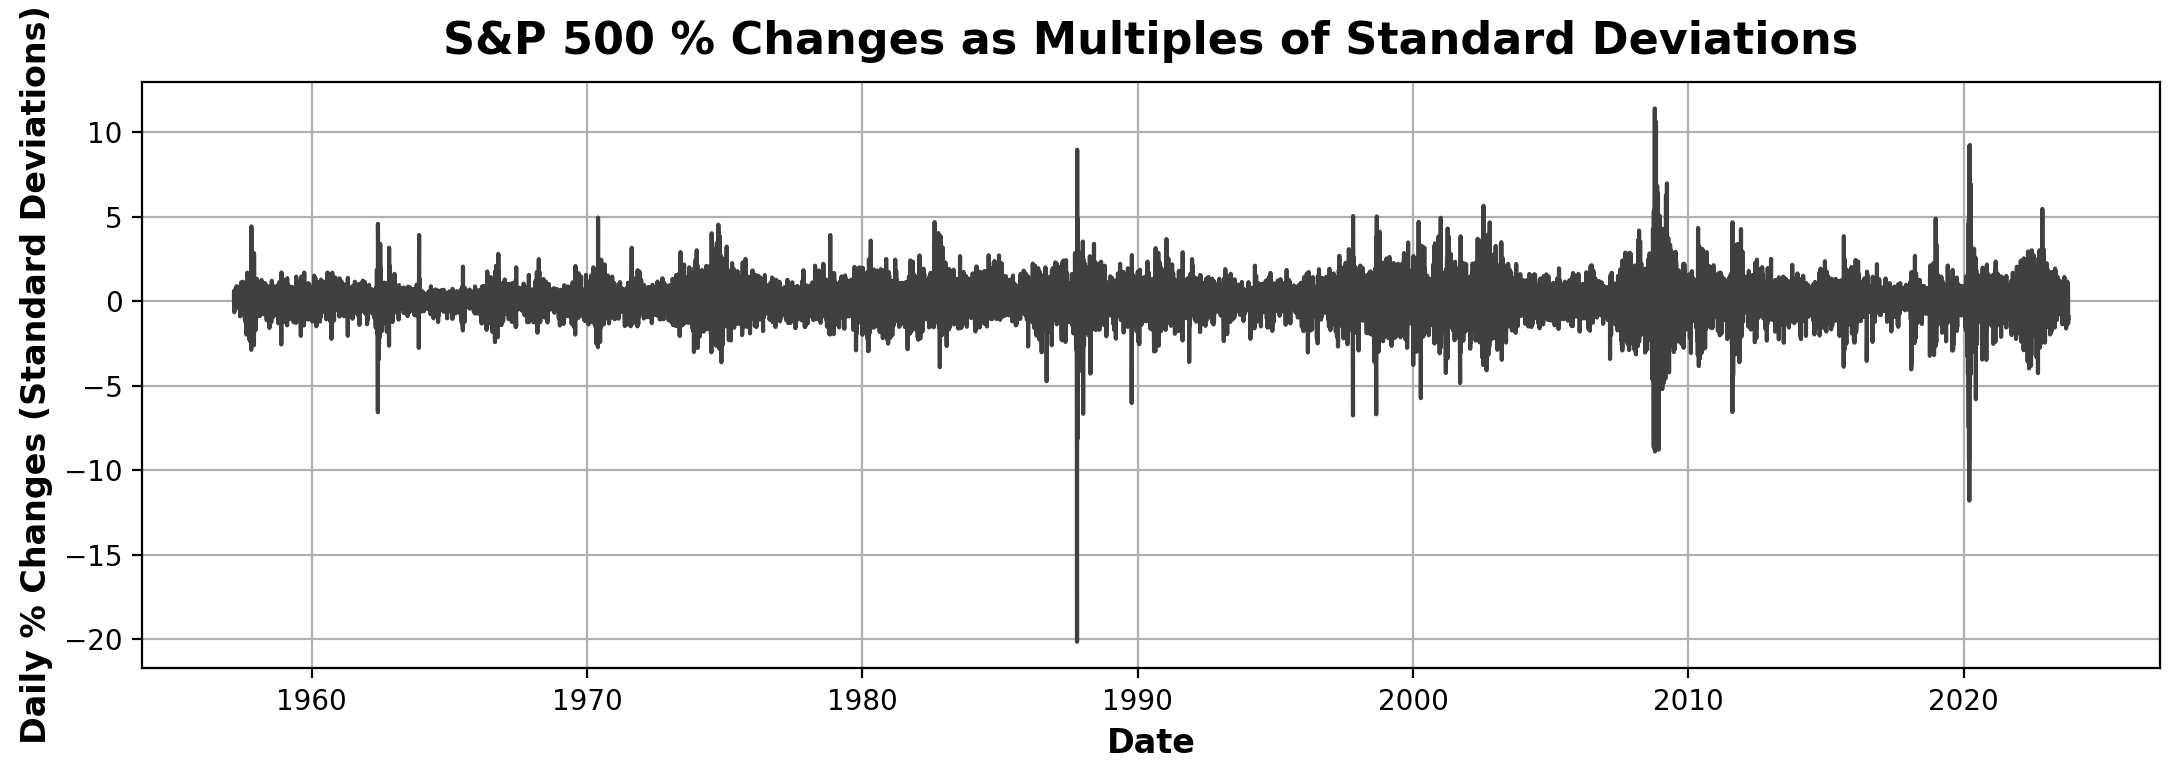

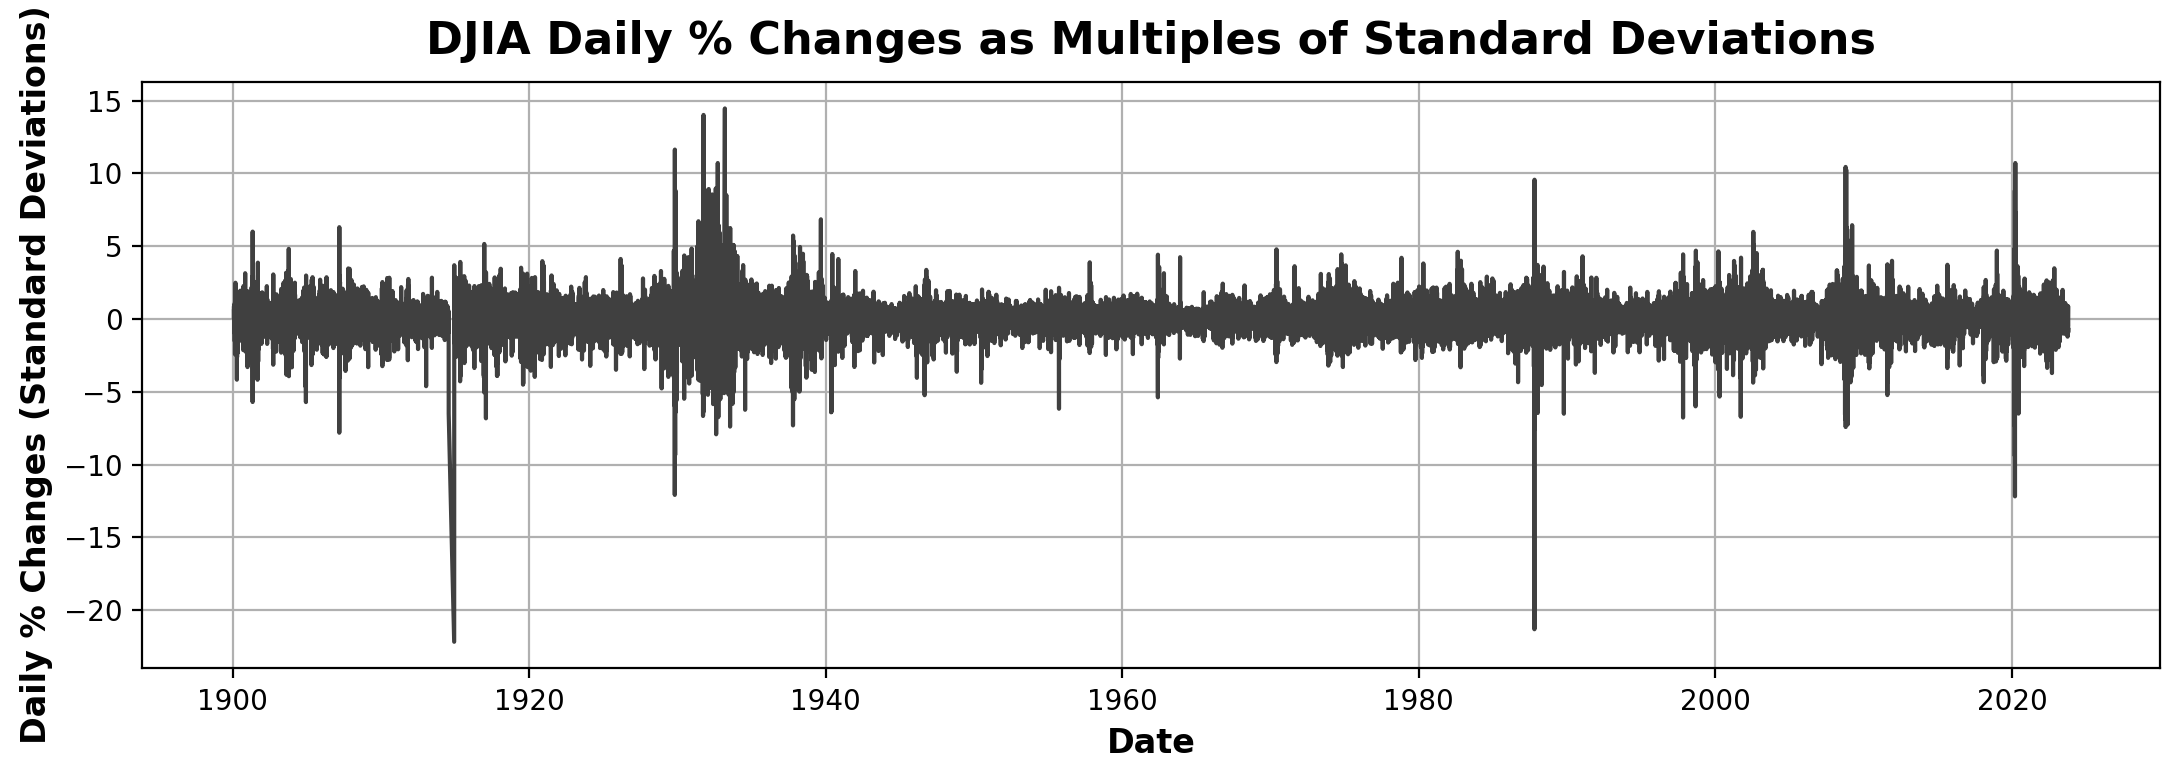

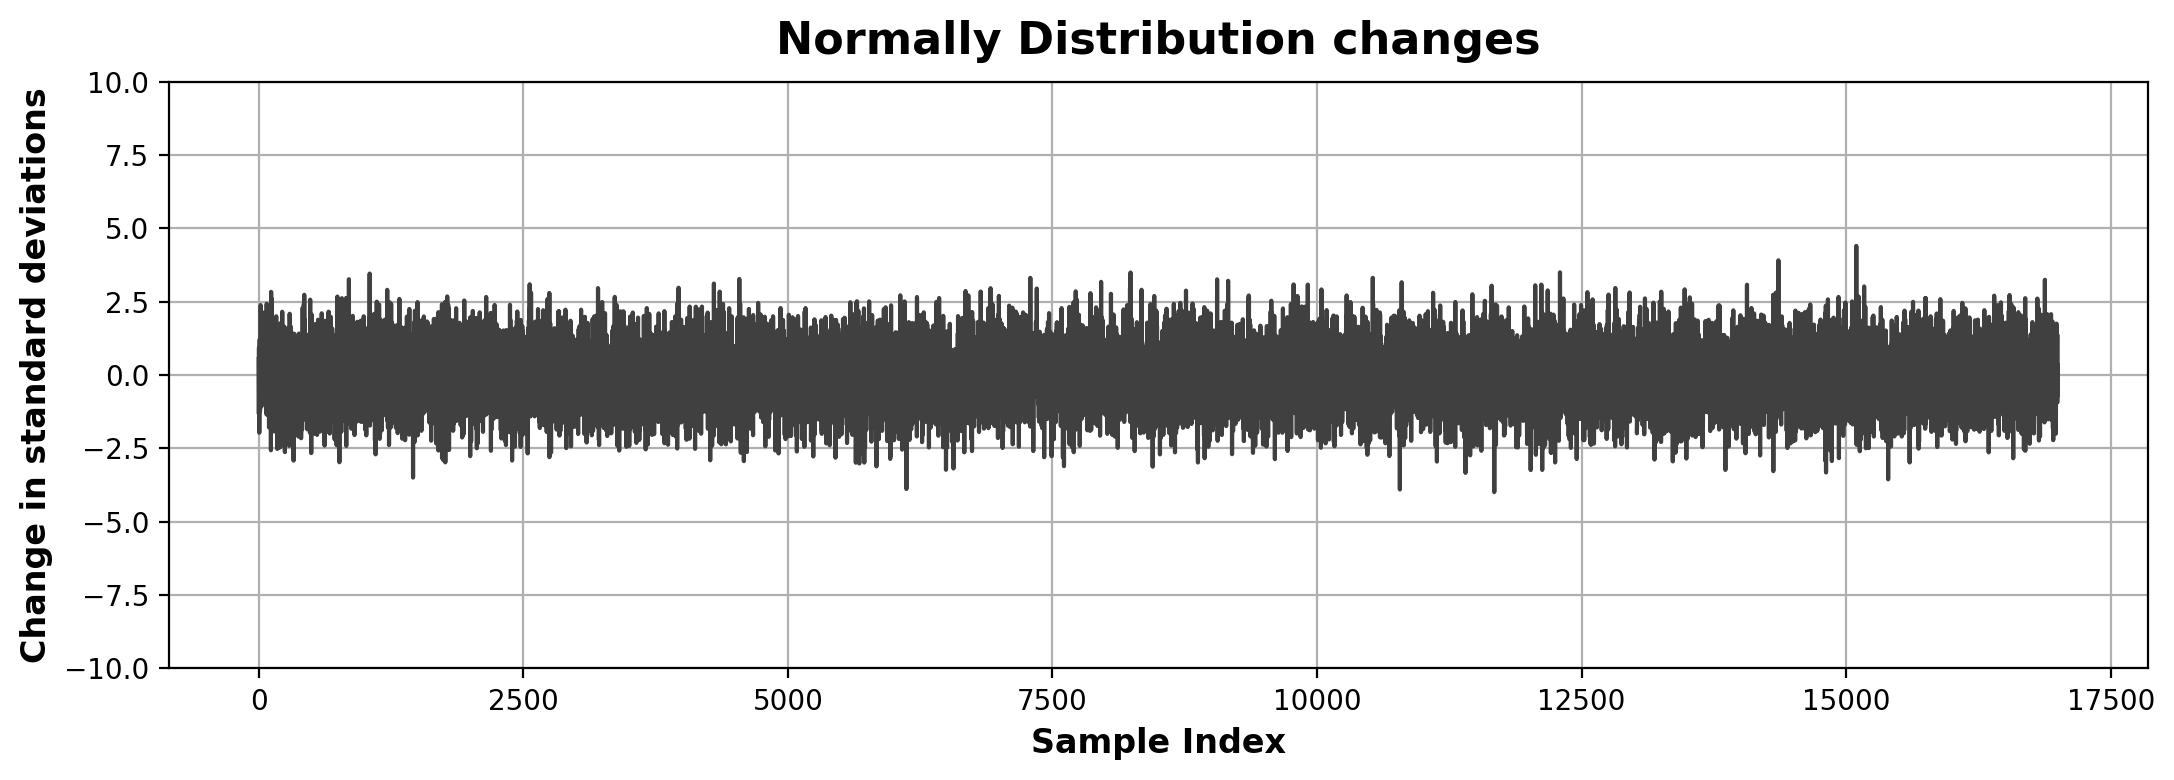

In [52]:
df1['Percent_change']=df1['SP500 Price'].pct_change()*100
df2['Percent_change']=df2['DJIA Price'].pct_change()*100

stdev1=df1['Percent_change'].std()
mean1=df1['Percent_change'].mean()

plt.plot(df1['SP500 Date'][1:], df1['Percent_change'][1:]/stdev1, color='0.25')
plt.xlabel('Date')
plt.ylabel('Daily % Changes (Standard Deviations)')
plt.title('S&P 500 % Changes as Multiples of Standard Deviations')
plt.grid(True)
plt.show()

stdev2=df2['Percent_change'].std()
mean2=df2['Percent_change'].mean()

plt.plot(df2['DJIA Date'][1:], df2['Percent_change'][1:]/stdev2, color='0.25')
plt.xlabel('Date')
plt.ylabel('Daily % Changes (Standard Deviations)')
plt.title('DJIA Daily % Changes as Multiples of Standard Deviations')
plt.grid(True)
plt.show()

normal_changes=np.random.normal(loc=0, scale=1, size=17000)
stdev3=normal_changes.std()
mean3=normal_changes.mean()

plt.plot(normal_changes/stdev3, color='0.25')
plt.xlabel('Sample Index')
plt.ylim(-10,10)
plt.ylabel('Change in standard deviations')
plt.title('Normally Distribution changes')
plt.grid(True)
plt.show()

Shown above are the changes in terms of number of standard deviations from the average change. Notice how docile the Brownian changes are. One can calculate as below that 68% of its changes would take place within 1$\sigma$ from the average change and 99.73% within 3$\sigma$, where $\sigma$ is the value of the standard deviation of the normal distribution. In contrast, there are multiple changes above 5$\sigma$ in the real market plots and some even crossing 20$\sigma$!

We also see how visually the Wiener process could pass off as a model of the real world, but upon looking at the distribution of its changes, that conclusion is ruled out. Note how large changes tend to cluster together in the plots of the indices, something visibly absent from the Gaussian distributed last plot.

In [13]:
lim1_lower=mean1-stdev1
lim1_upper=mean1+stdev1
changes_within_stdev1=df1['Percent_change'].dropna()[(df1['Percent_change'] >= lim1_lower) & (df1['Percent_change'] <= lim1_upper)]
frac1=round(len(changes_within_stdev1)/len(df1['Percent_change'].dropna()),2)

lim2_lower=mean2-stdev2
lim2_upper=mean2+stdev2
changes_within_stdev2=df2['Percent_change'].dropna()[(df2['Percent_change'] >= lim2_lower) & (df2['Percent_change'] <= lim2_upper)]
frac2=round(len(changes_within_stdev2)/len(df2['Percent_change'].dropna()),2)

lim3_lower=mean3-stdev3
lim3_upper=mean3+stdev3
changes_within_stdev3=normal_changes[(normal_changes >= lim3_lower) & (normal_changes <= lim3_upper)]
frac3=round(len(changes_within_stdev3)/len(normal_changes),2)

print("The fraction of days with changes within " u"\u00B1" "1% of the mean is", frac1,"for the S&P 500 index,", frac2,"for the DJIA", frac3,"for a Gaussian distribution.")

The fraction of days with changes within ±1% of the mean is 0.79 for the S&P 500 index, 0.8 for the DJIA 0.69 for a Gaussian distribution.


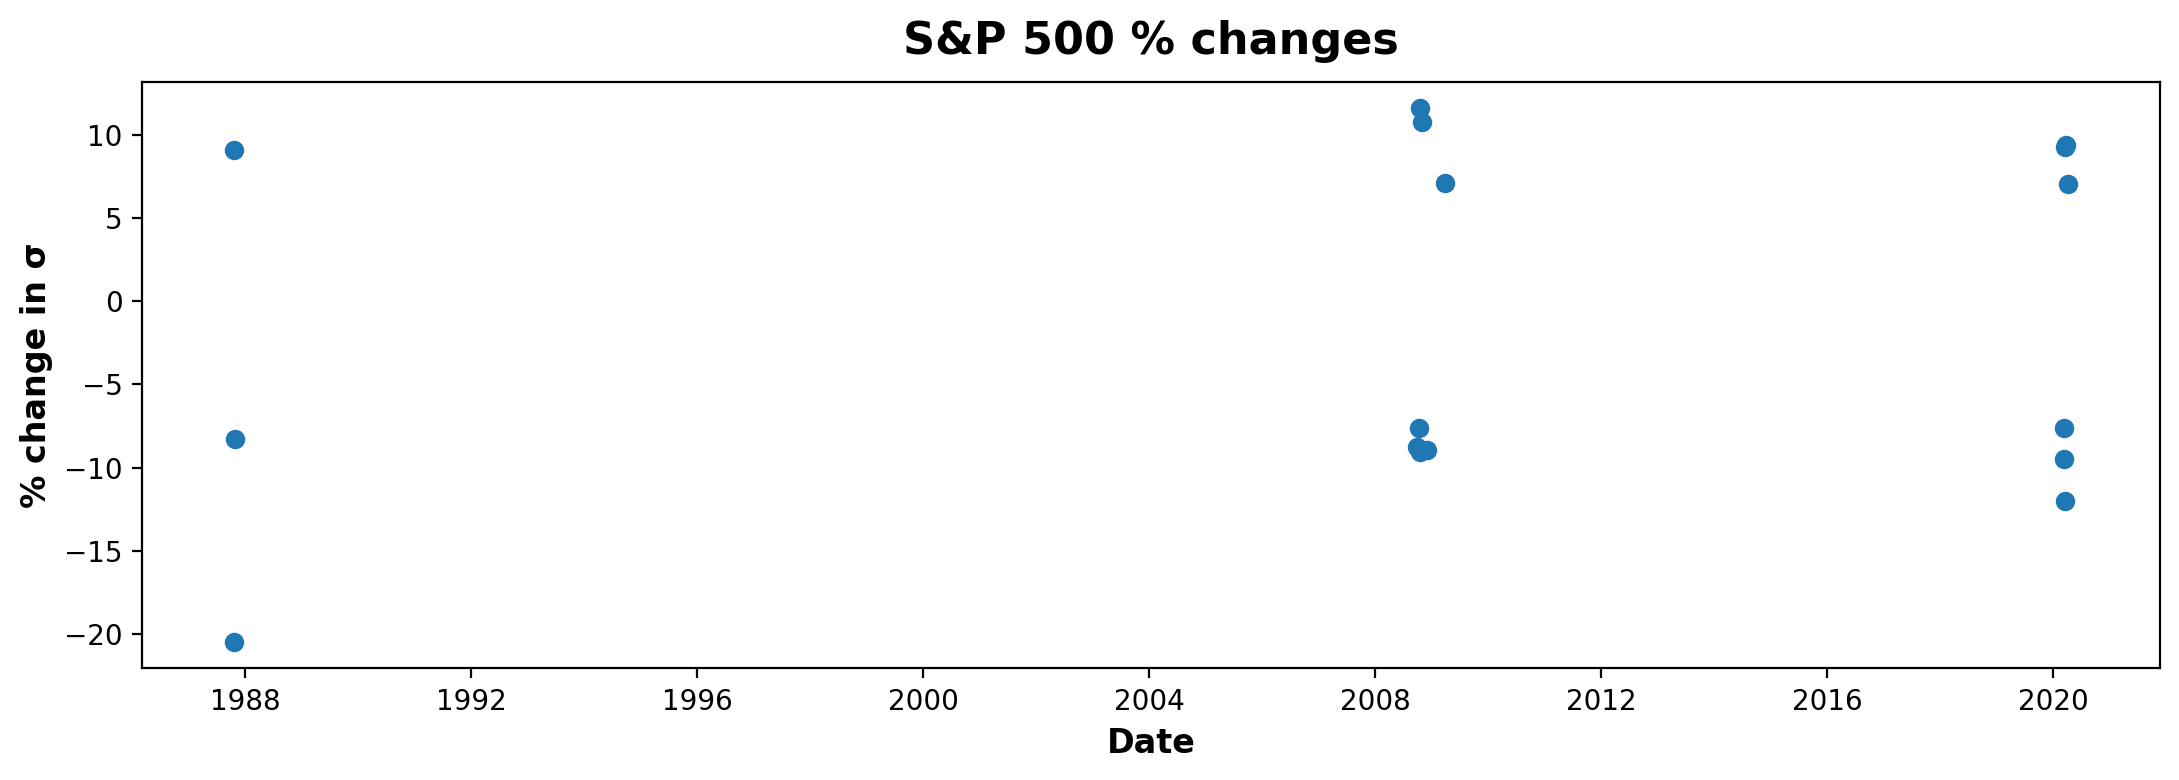

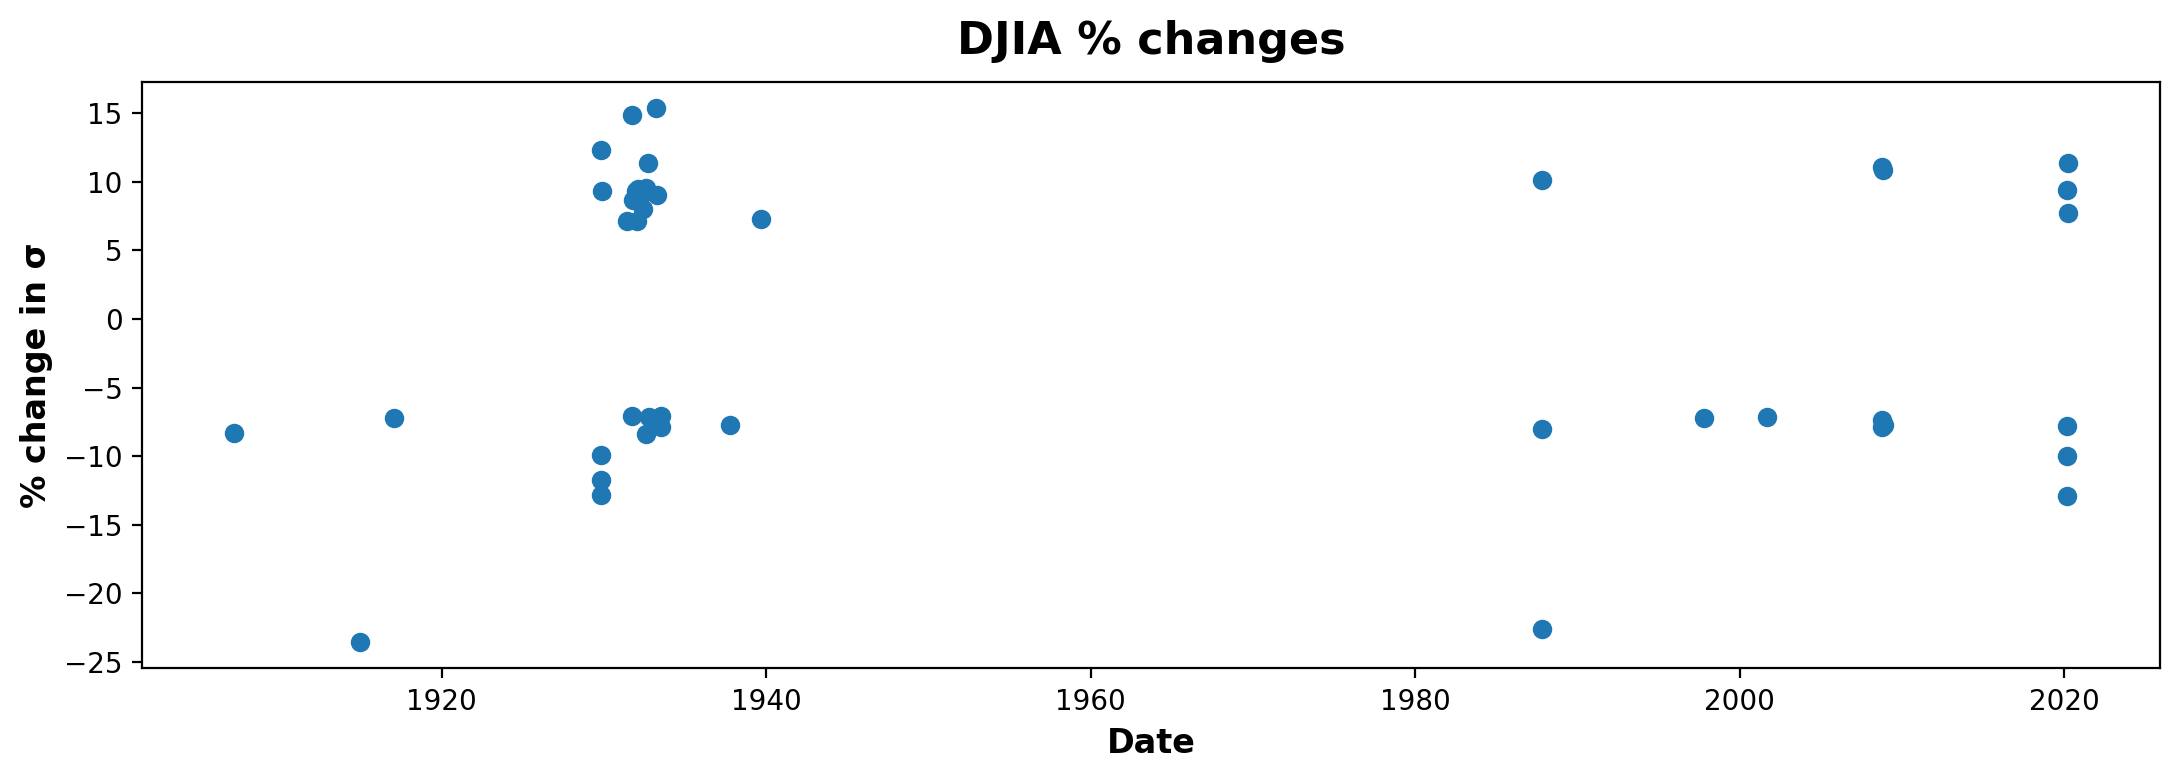

In [66]:
filtered_df1=df1[df1['Percent_change'].abs()>7]
fig, ax = plt.subplots()
ax.set_xlabel('Date')
ax.set_ylabel('% change in \u03C3')
ax.set_title('S&P 500 % changes')
ax.scatter('SP500 Date','Percent_change',data=filtered_df1,linestyle='None')
plt.show()

filtered_df2=df2[df2['Percent_change'].abs()>7]
fig, ax = plt.subplots()
ax.set_xlabel('Date')
ax.set_ylabel('% change in \u03C3')
ax.set_title('DJIA % changes')
ax.scatter('DJIA Date','Percent_change',data=filtered_df2,linestyle='None')
plt.show()

We see how the large changes tend to bunch up together. This is known as volatility clustering. Also, it should be noted that not all changes are equal. Assume a value of 100 for the index. A 10% fall followed by a 10% rise leads to a value of 99, a 1% loss. Similarly for a 10% rise followed by a 10% fall.

Having looked at percent changes, let's look at daily changes in log scale and absolute scale. The log scale puts the impact of larger events in prominence. Apparently larger absolute changes taking place in today's age may well be relatively unimportant when taken as a fraction of the price. For example, the COVID crash as seen from the absolute scale plot would make us think that it had the sharpest drawdown in history, but that is only because of the magnitude of price changes and not due its relative changes. These are shown in proportion to other major events, like the crash of 2008, Black Monday of 1987 or the Great Depression, by the log scale plots.

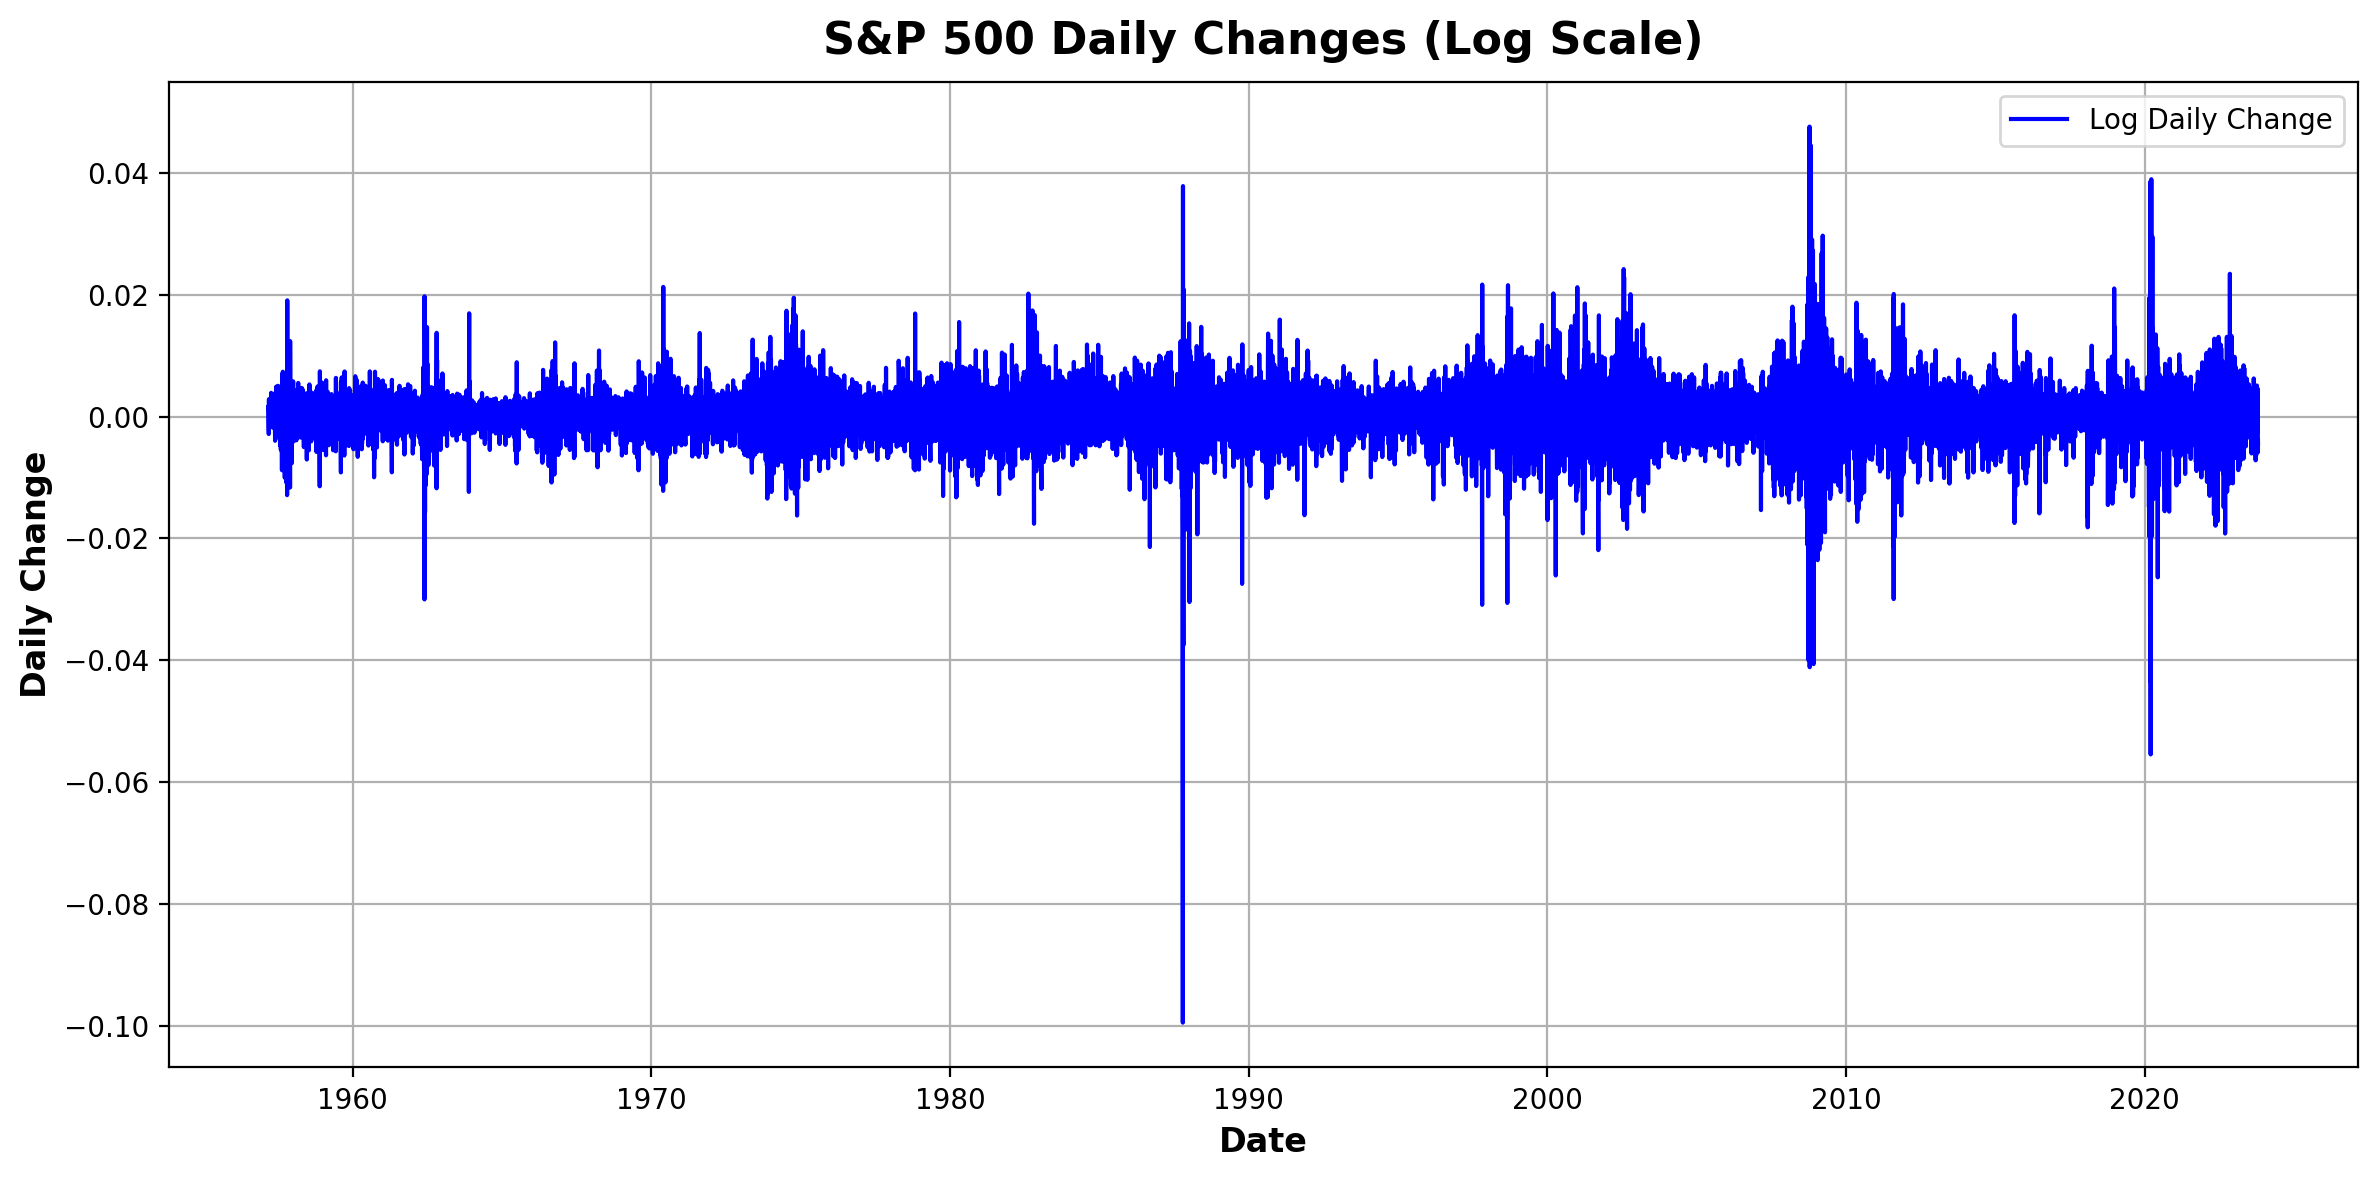

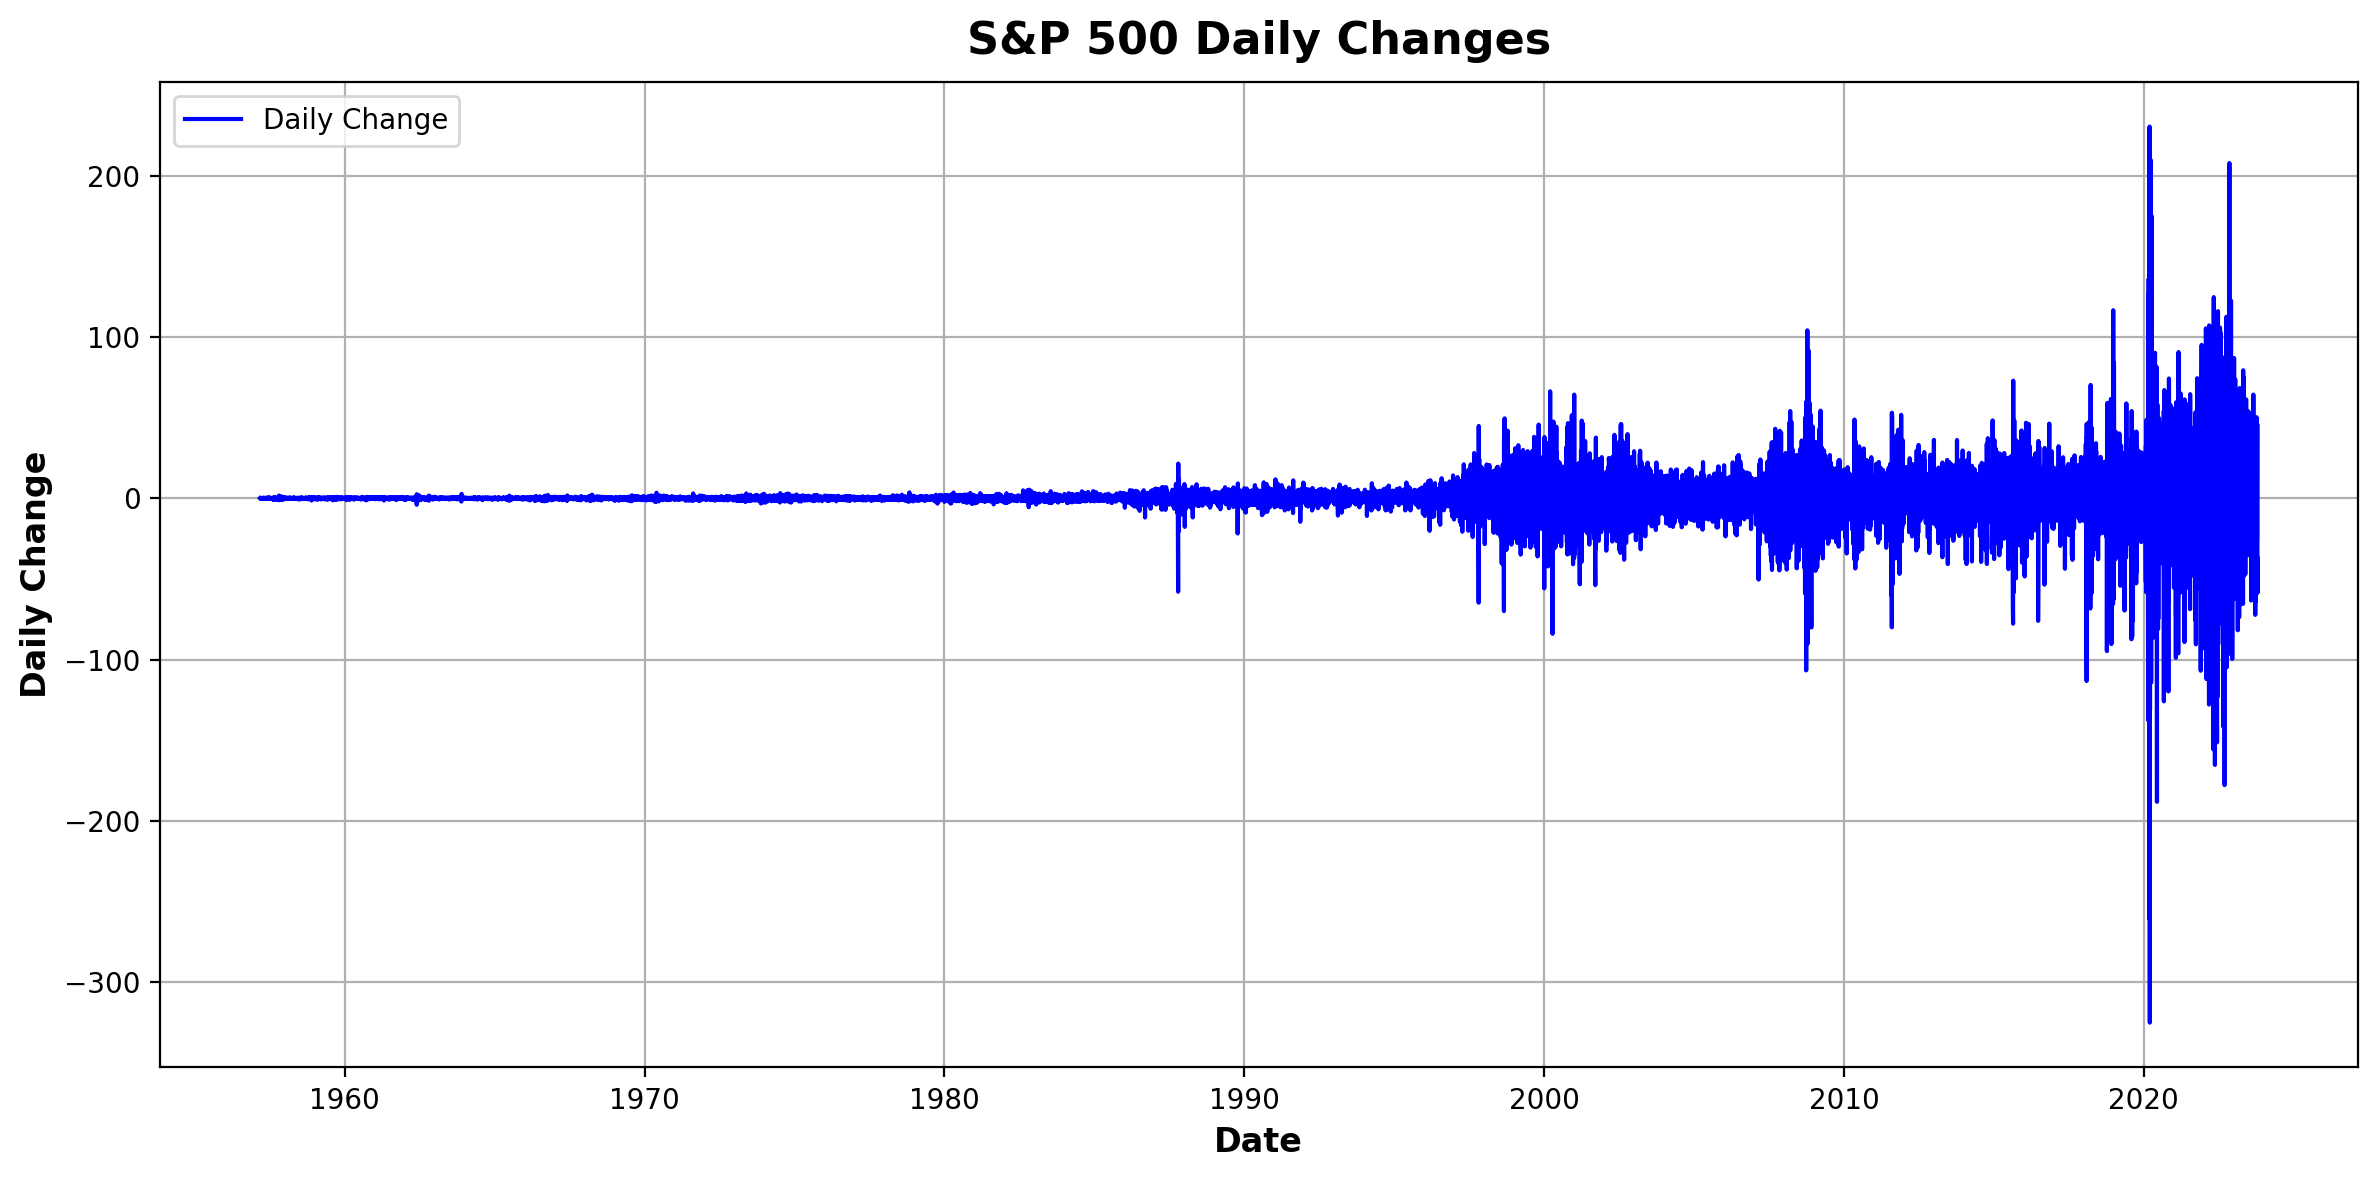

In [14]:
df1['Log_daily_change']=df1['SP500Log_price'].diff()
df1.dropna()

plt.figure(figsize=(12, 6))
plt.plot(df1['SP500 Date'], df1['Log_daily_change'], color='b', label='Log Daily Change')
plt.xlabel('Date')
plt.ylabel('Daily Change')
plt.title('S&P 500 Daily Changes (Log Scale)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

df1['Daily_change']=df1['SP500 Price'].diff()
df1.dropna()

plt.figure(figsize=(12, 6))
plt.plot(df1['SP500 Date'], df1['Daily_change'], color='b', label='Daily Change')
plt.xlabel('Date')
plt.ylabel('Daily Change')
plt.title('S&P 500 Daily Changes')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

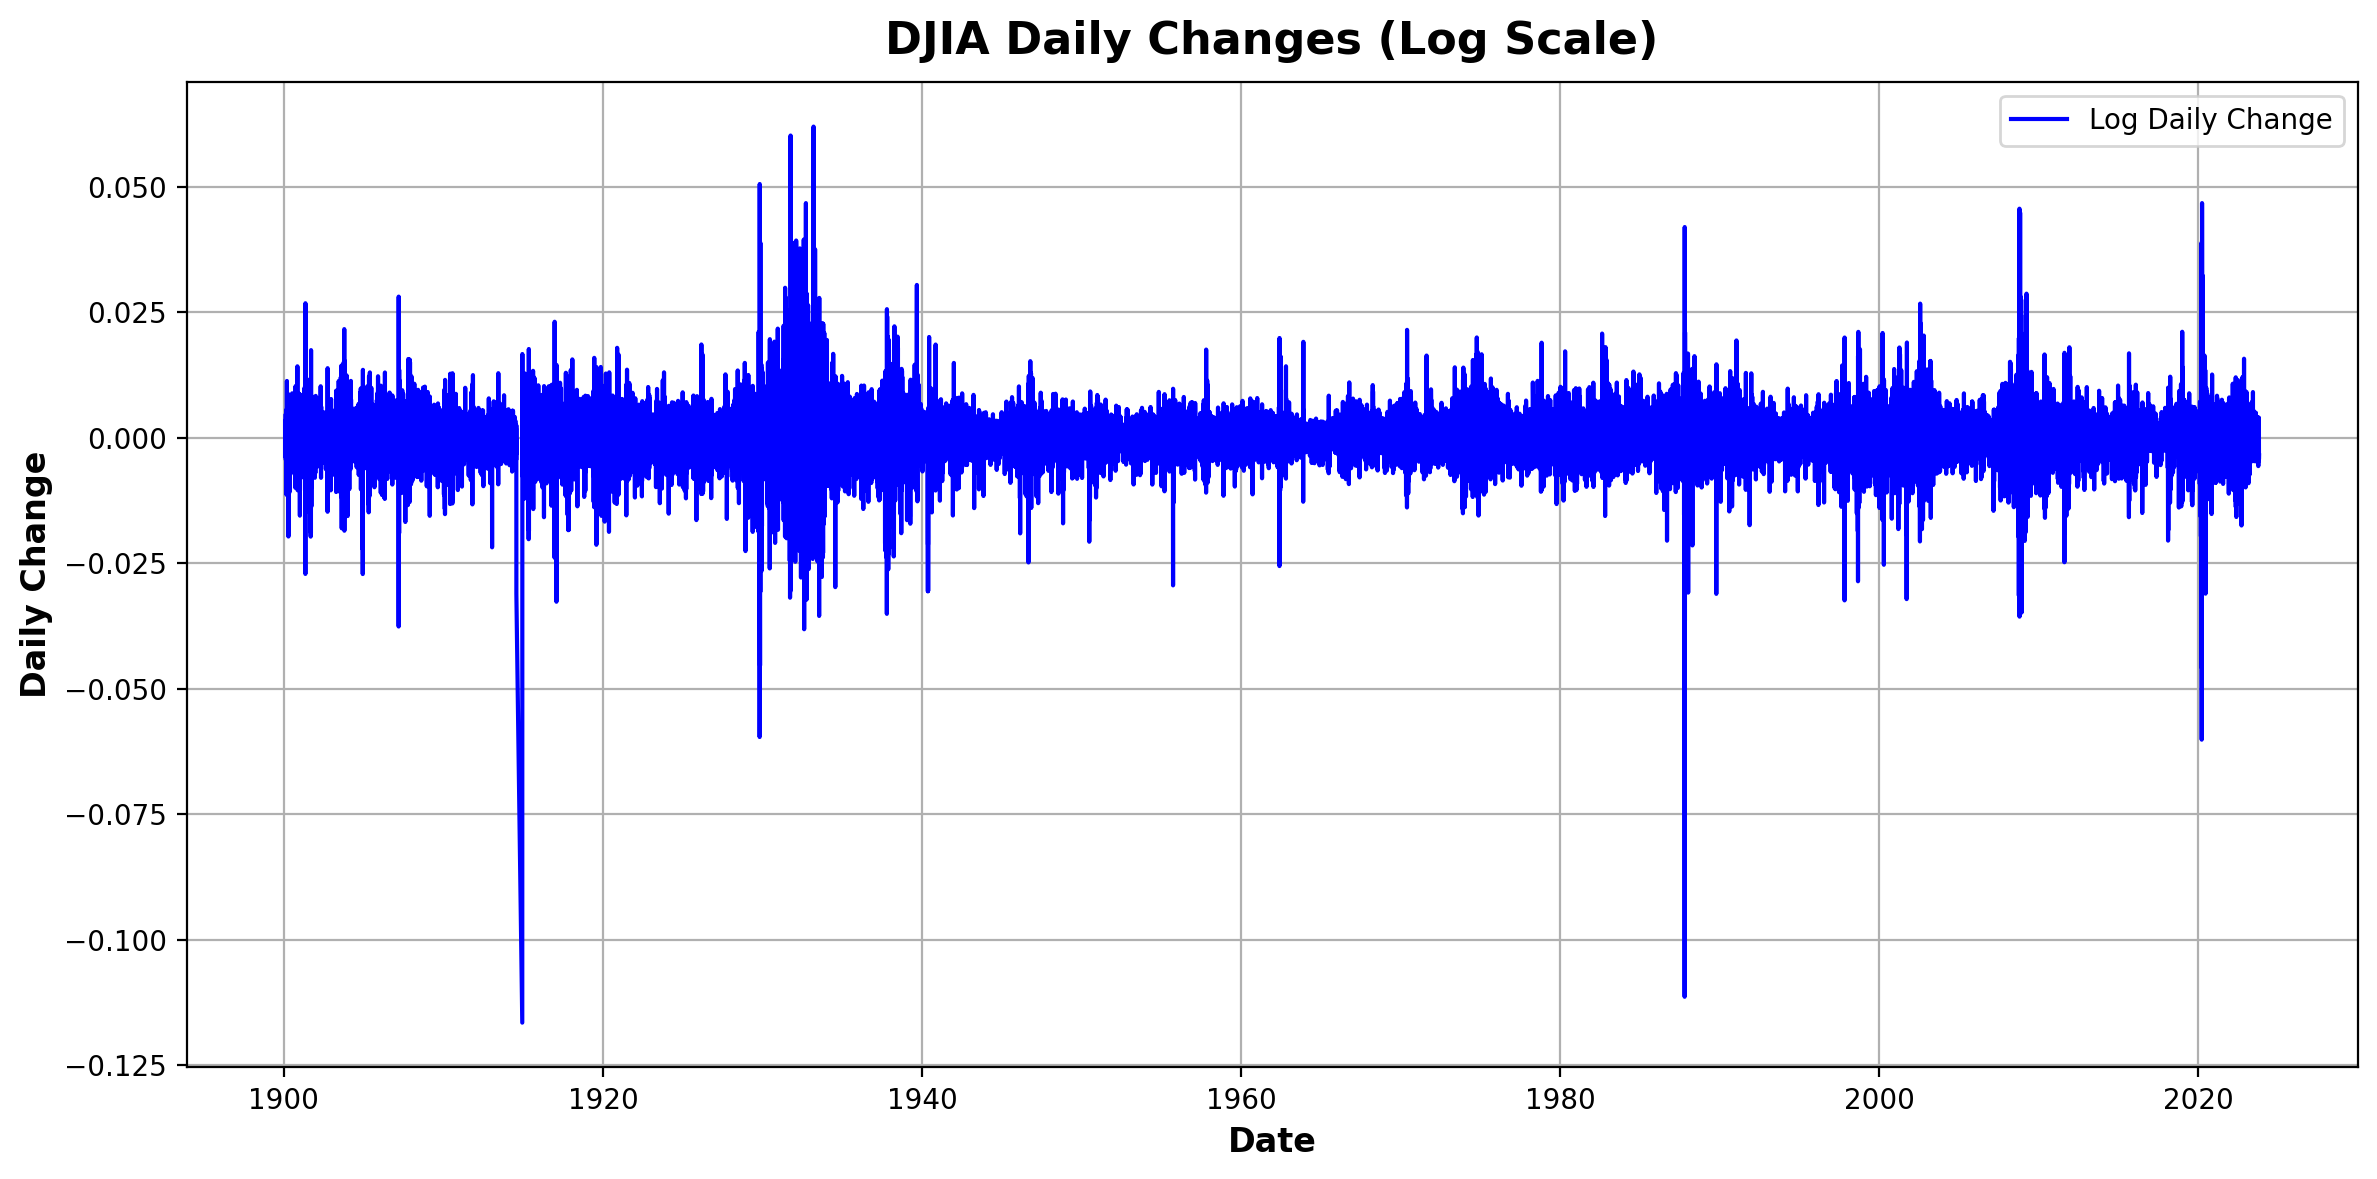

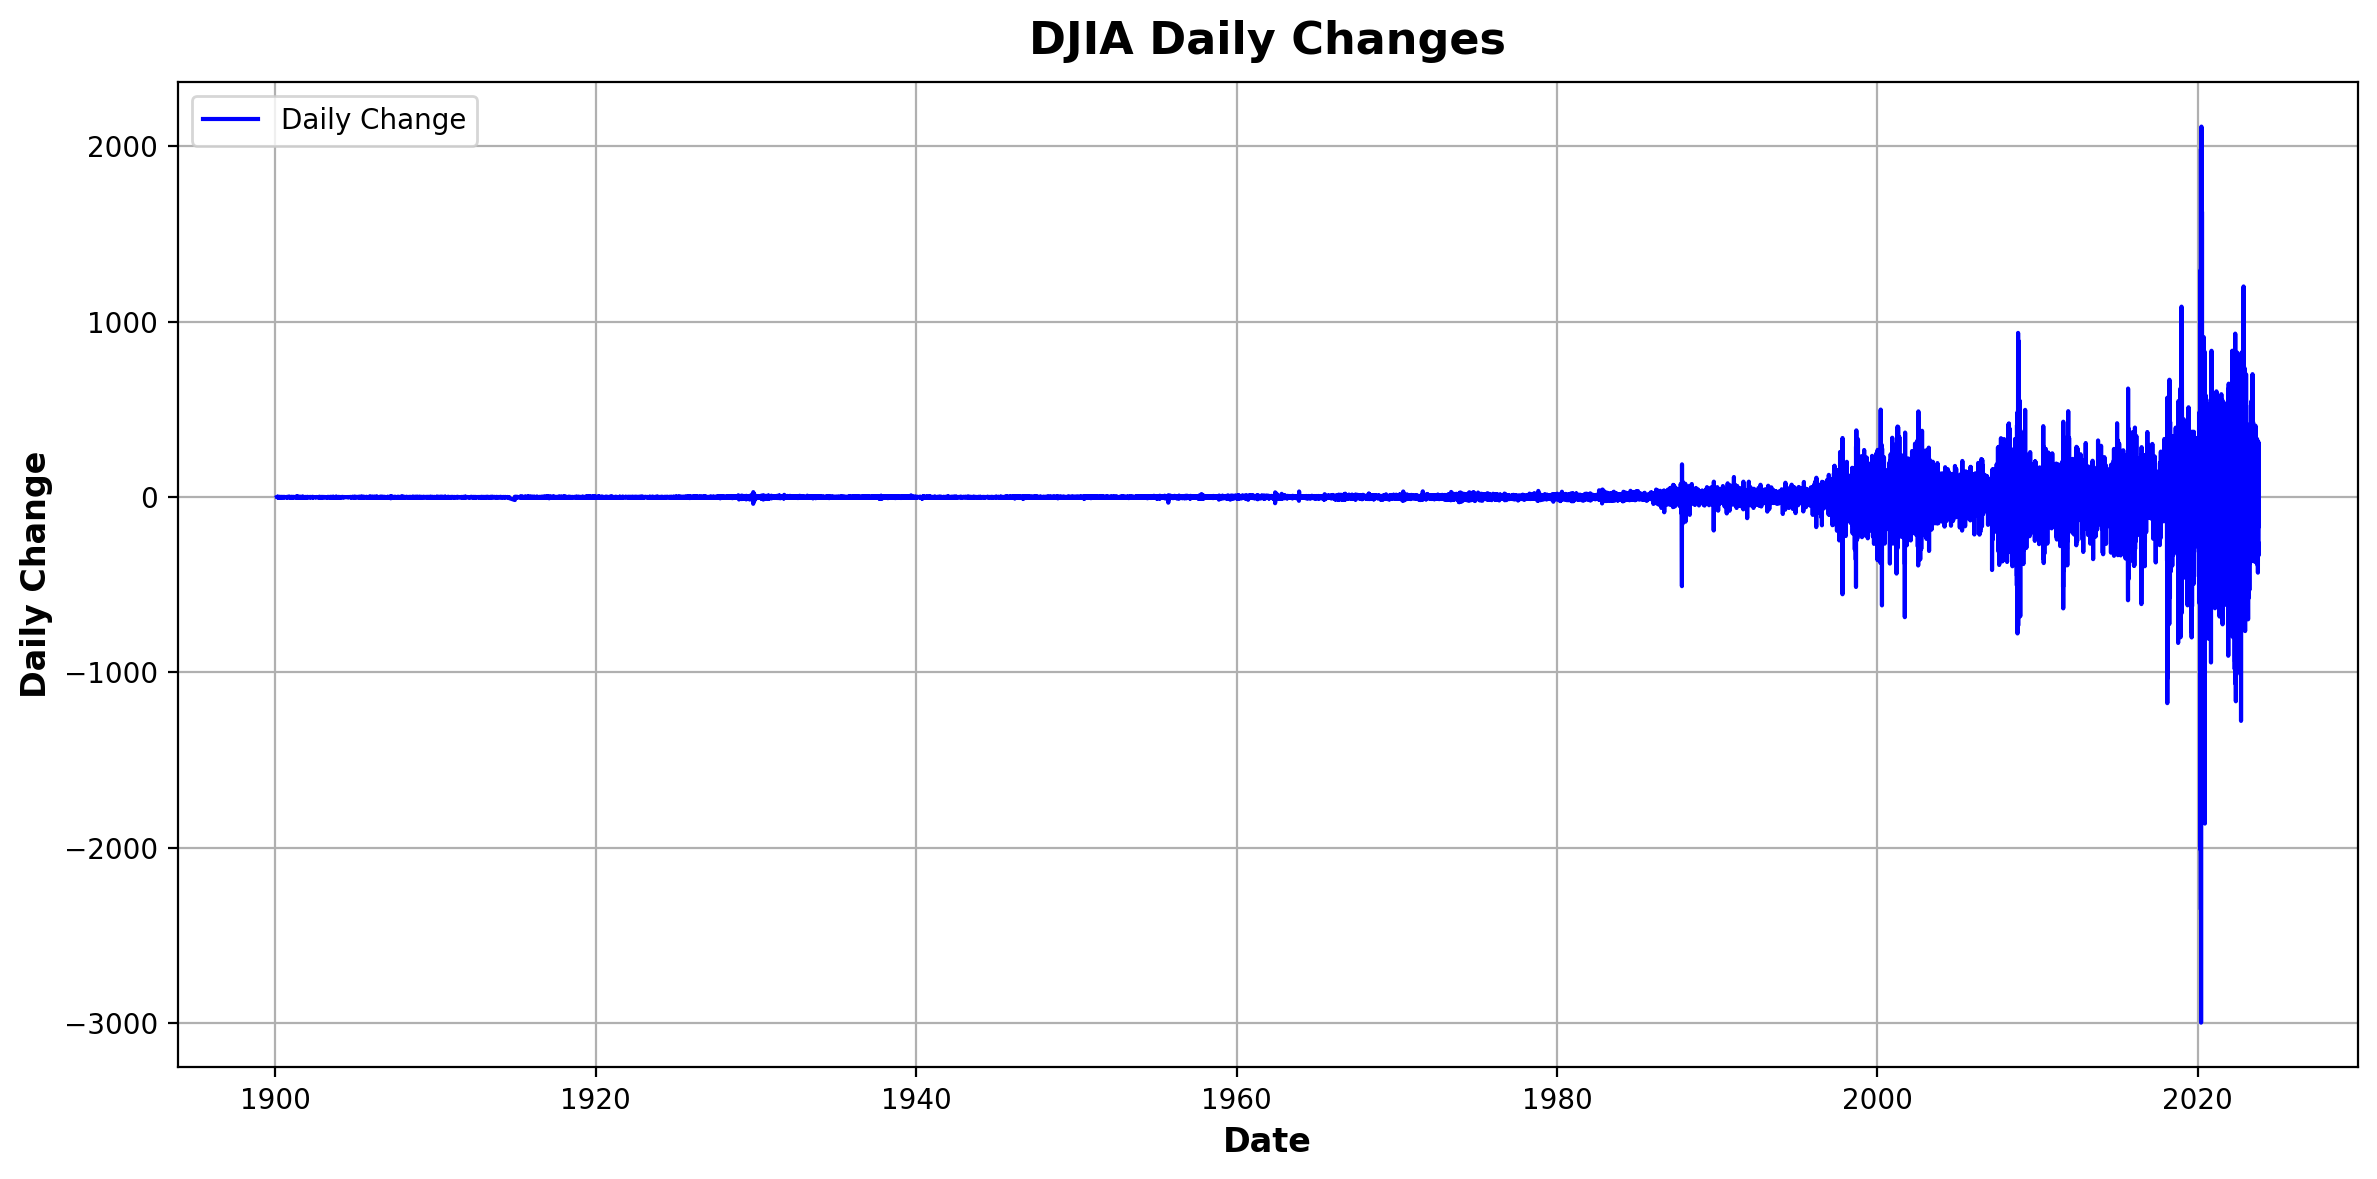

In [41]:
df2['Log_daily_change']=df2['DJIALog_price'].diff()
df2.dropna()

plt.figure(figsize=(12, 6))
plt.plot(df2['DJIA Date'], df2['Log_daily_change'], color='b', label='Log Daily Change')
plt.xlabel('Date')
plt.ylabel('Daily Change')
#plt.yscale('log')  # Set y-axis to logarithmic scale
plt.title('DJIA Daily Changes (Log Scale)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

df2['Daily_change']=df2['DJIA Price'].diff()
df2.dropna()

plt.figure(figsize=(12, 6))
plt.plot(df2['DJIA Date'], df2['Daily_change'], color='b', label='Daily Change')
plt.xlabel('Date')
plt.ylabel('Daily Change')
#plt.yscale('log')  # Set y-axis to logarithmic scale
plt.title('DJIA Daily Changes')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Let's cast the changes in these two time series into probability distributions. We will work with percentage changes.

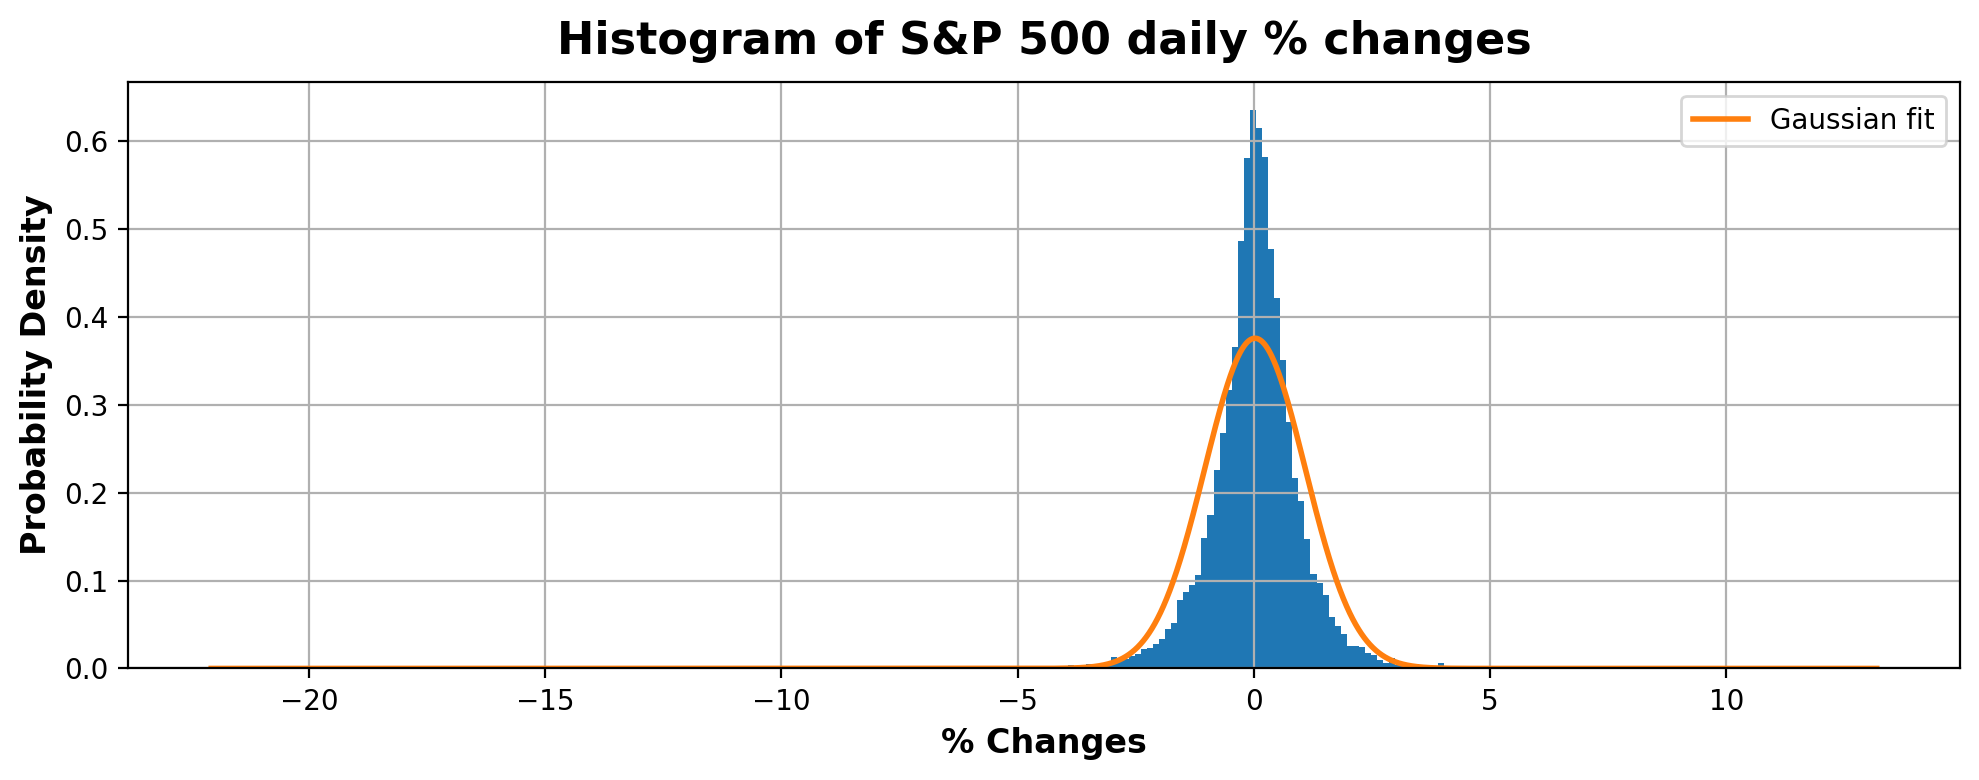

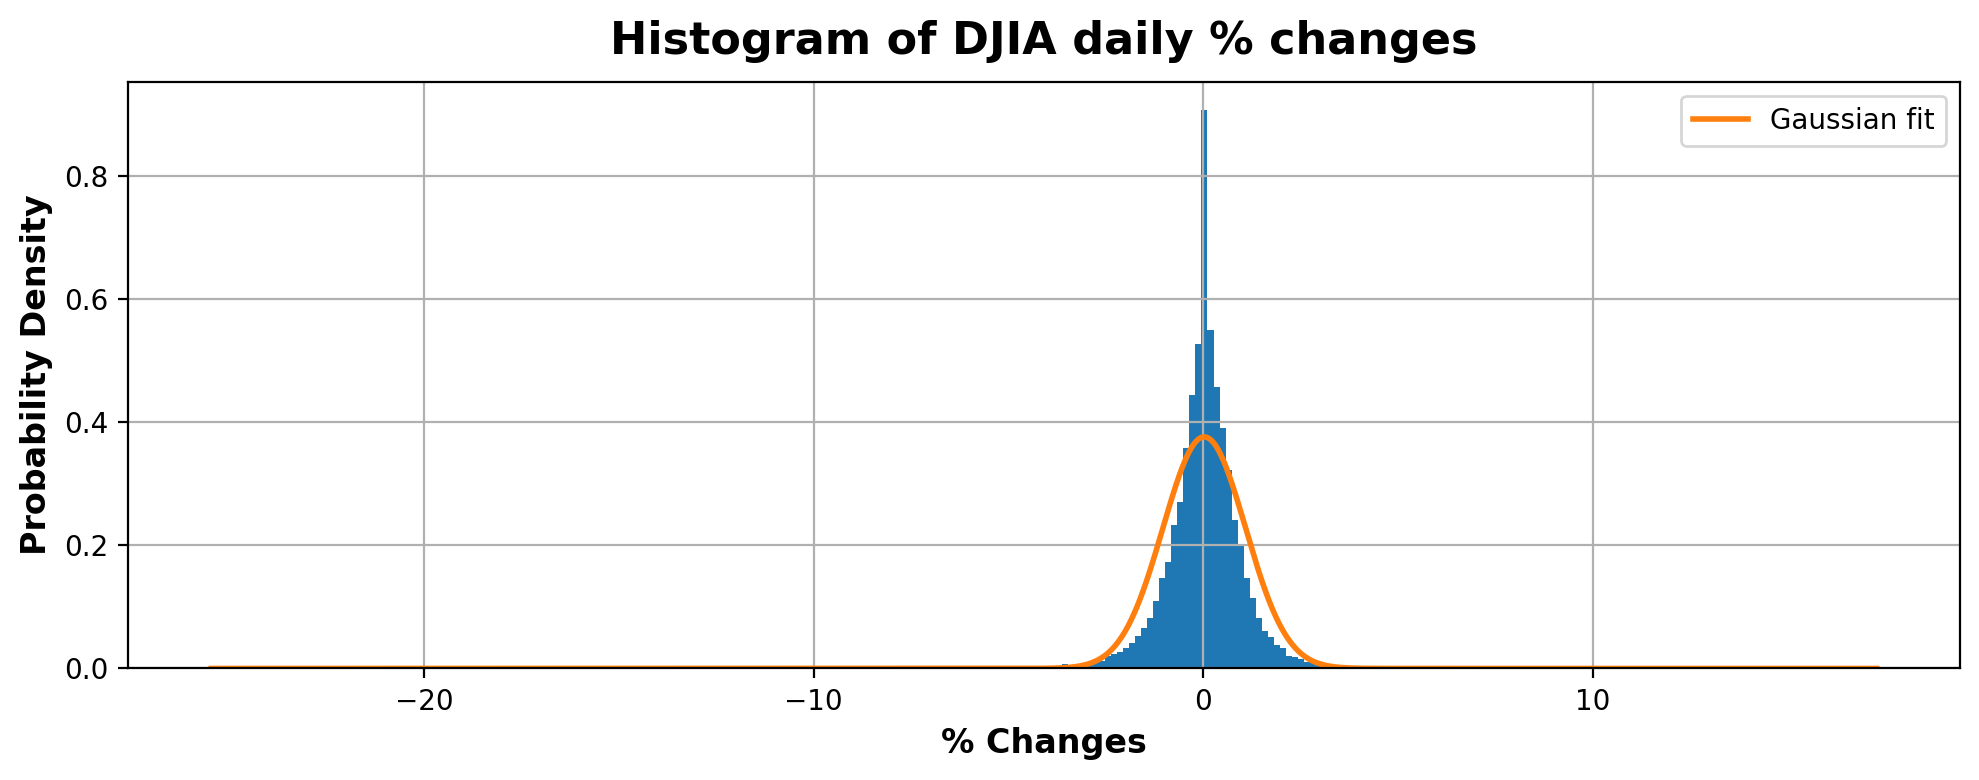

In [79]:
from scipy.stats import skew
from scipy.stats import kurtosis
import seaborn as sns
from scipy.stats import norm,lognorm

plt.figure(figsize=(10, 4))
plt.hist(df1['Percent_change'].dropna(), bins=250, density=True, align='mid')
# Overlay Gaussian curve
xmin, xmax = plt.xlim()
x=np.linspace(xmin, xmax, 10000)
p=norm.pdf(x, mean2, stdev2)
plt.plot(x, p, linewidth=2, label='Gaussian fit')
plt.xlabel('% Changes')
plt.ylabel('Probability Density')
plt.title('Histogram of S&P 500 daily % changes')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 4))
plt.hist(df2['Percent_change'].dropna(), bins=250, density=True, align='mid')
# Overlay Gaussian curve
xmin, xmax = plt.xlim()
x=np.linspace(xmin, xmax, 10000)
p=norm.pdf(x, mean2, stdev2)
plt.plot(x, p, linewidth=2, label='Gaussian fit')
plt.xlabel('% Changes')
plt.ylabel('Probability Density')
plt.title('Histogram of DJIA daily % changes')
plt.grid(True)
plt.legend()
plt.show()

In [63]:
skew1=skew(df1['Percent_change'].dropna())
kurtosis1=kurtosis(df1['Percent_change'].dropna())
print("Skewness of S&P 500 % changes:", round(skew1,2))
print("Kurtosis of S&P 500 % changes:", round(kurtosis1,2))

skew2=skew(df2['Percent_change'].dropna())
kurtosis2=kurtosis(df2['Percent_change'].dropna())
print("Skewness of DJIA % changes:", round(skew2,2))
print("Kurtosis of DJIA % changes:", round(kurtosis2,2))

skew3=skew(normal_changes)
kurtosis3=kurtosis(normal_changes)
print("Skewness of the normal distribution:", round(skew3,2))
print("Kurtosis of the normal distribution:", round(kurtosis3,2))

Skewness of S&P 500 % changes: -0.61
Kurtosis of S&P 500 % changes: 20.15
Skewness of DJIA % changes: -0.52
Kurtosis of DJIA % changes: 26.03
Skewness of the normal distribution: 0.01
Kurtosis of the normal distribution: 0.0


As shown above, there is considerable skew and kurtosis in the real price change distributions, which is further confirmation that these price changes are not normally distributed. The Dow kurtosis is larger than that of the S&P 500 which could be because of the larger dataset due to which more number of extreme events were captured, whose large 4th moments contributed to making its kurtosis bigger. 

We also see how the distributions of percentage price changes are much more peaked than the Gaussian and fall off faster as well.

*Future work* - Further analysis would consist of detecting the presence of long memory in these time series and estimating the thickness of the tails of the price change distributions.

**References**

1. Plots of volatility clustering and log changes are insipred by ideas from the work of Benoit B. Mandelbrot.